# Credit Card Fraud Detection

# Phases
A typical data science project has several phases (Cross-Industry Standard Process for Data Mining (CRISP-DM)). Phases adapted to this project
1) Business Understanding: Understand the business problem and define the objectives of the project.

2) Data Understanding: Understand the data and its structure. We look at the data types, missing values, and other characteristics of the data. Discover and visualize the data to gain insights.
- Load Data
- PCA for reducing features (Need for?)
- Exploratory Data Analysis (EDA): Data Analysis Process with estatistical analysis and data visualization for knowing data and obtain findings
a) Data Exploration: Examining summary statistics, visualizing data distributions, and identifying patterns or relationships.
b) Data Visualization: Presenting insights through plots, charts, and graphs to communicate findings effectively

3) Data Preparation: Prepare the data for modeling by cleaning it up and transforming it into a format that can be used by machine learning algorithms.  
- Data Cleaning: Handling missing values and categorical values, removing outliers and duplicates, and ensuring data quality.
- Data Transforming
- Feature Engineering: Transforming variables, creating new features, or selecting relevant variables for analysis.
-- Feature selection: selecting the most useful features to train on among existing features. 
-- Feature extraction: combining existing features to produce a more useful one (e.g. handling missing data, encoding variables, dealing with categorical variables, dimensionality reduction algorithms ...). 
-- Creating new features by gathering new data.
- PCA for reducing features (or in the begining after loading data) (need for?)
- Data Visualization after Data Preparation: Presenting insights through plots, charts, and graphs to communicate findings effectively

4) Modeling / Select and Train Models: We create a model that can be used to make predictions or classify new data. 
- Retrieve Class (y) from the dataset (X)
- Split Data
- Normal Test
- OverSampling (SMOTE) and undersampling (need for?)
- Calculate the weights for each sample based on the feature (transaction amount) and class weight (need for?)
- Intermediate Results (need for?)
- Train model (w/cross-validate) (based on OverSampling (SMOTE) and undersampling) (need for?)

5) Evaluation: We evaluate the model’s performance and determine whether it meets the business objectives.
- Evaluation using cross-validate
- Fine-tune Models  
- Model Evaluation on Test Set

6) Deployment Deploy the model into production and monitor its performance over time.

Note: The exploratory data analysis (EDA) is mainly on 2) Data Understanding, but also a bit on 3) Data Preparation

# 1) Business Understanding
Understand the business problem and define the objectives of the project.

## Objective

Consider the data `creditcard.csv` and obtain a model to detect fraudulent credit card transactions.. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Obtain the best solution (model and training procedure) for this case.

## Dataset

28 fields (only numerical input variables) which are the result of a PCA transformation. This means that your original dataset had more than 28 variables, and PCA was used to reduce it to 28 variables while retaining most of the information in the original dataset.
- Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 
- The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning
Note: The cost of a false positive (predicting fraud when there is none) might be the cost of investigating the transaction, while the cost of a false negative (failing to predict fraud when it is present) might be the cost of reimbursing the customer for the fraudulent transaction. The amount feature can be used in example-dependent cost-sensitive learning by assigning different costs to false positives and false negatives based on the amount of the transaction. For example, you might assign a higher cost to false negatives for high-value transactions because they are more costly to reimburse.
- Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# 2) Data Understanding
Understand the data and its structure. We look at the data types, missing values, and other characteristics of the data. Discover and visualize the data to gain insights.


## Import modules

In [77]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


## Load Data

read credit card transactions from csv file

In [78]:

PathFileName = 'creditcard.csv'
creditcardtransactionsHuge = pd.read_csv(PathFileName) #dataset with all transactions (train&test)

print ( f"creditcardtransactionsHuge shape {creditcardtransactionsHuge.shape} \n")

# show first 5 column
print (f"creditcardtransactionsHuge.head() \n {creditcardtransactionsHuge.head()}")


creditcardtransactionsHuge shape (284807, 31) 

creditcardtransactionsHuge.head() 
    Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0

## PCA for reducing features
SMOTE isn´t working due to more then 15 features


in the begining apply PCA
PCA 28 features in 9 + Time, Amount, Class 

In [79]:
import pandas as pd
from sklearn.decomposition import PCA

# Identify the features to apply PCA
creditcardtransactionswithout_3 = creditcardtransactionsHuge.drop(['Time', 'Amount', 'Class'], axis=1) #axis by default is 0 (drop a line) set to  1 (column)

# Apply PCA to reduce the number of 28 features to 9
pca = PCA(n_components=9) #
creditcardtransactions_pca_without_3 = pca.fit_transform(creditcardtransactionswithout_3) # transform the 28 pca features to 9 to hardest the job

#pca_features=('PCV1', 'PCV2', 'PCV3', 'PCV4', 'PCV5', 'PCV6', 'PCV7', 'PCV8', 'PCV9')
pca_features = ['PCV{}'.format(i+1) for i in range(9)]
creditcardtransactions_pca_pd = pd.DataFrame(creditcardtransactions_pca_without_3, columns=pca_features)

full_attribs = list(creditcardtransactions_pca_pd) 

creditcardtransactions_pca_pd[['Time', 'Amount', 'Class']] = creditcardtransactionsHuge [['Time', 'Amount', 'Class']]

# Check for missing values
print(f"creditcardtransactions_pca_pd.isnull().sum() \n {creditcardtransactions_pca_pd.isnull().sum()} \n")

# Check for duplicates
duplicates = creditcardtransactions_pca_pd.duplicated().sum()
print(f"creditcardtransactions_pca_pd.duplicated().sum() \n {duplicates} \n")

# creditcardtransactionsHuge becomes with 12 features
creditcardtransactionsHuge = creditcardtransactions_pca_pd

creditcardtransactions_pca_pd.isnull().sum() 
 PCV1      0
PCV2      0
PCV3      0
PCV4      0
PCV5      0
PCV6      0
PCV7      0
PCV8      0
PCV9      0
Time      0
Amount    0
Class     0
dtype: int64 

creditcardtransactions_pca_pd.duplicated().sum() 
 1081 



## 2b) Exploratory Data Analysis (EDA)
Data Analysis Process with estatistical analysis and data visualization for knowing data and obtain findings

a) Data Exploration: Examining summary statistics, visualizing data distributions, and identifying patterns or relationships.
i) Get a quick description of the data: (info (), for categorical atributes use value_counts())
- total number of rows
- each attribute’s type 
-- understand the non numeric 
-- categorical attribute: find out what categories exist and how many (value_counts())
--- Group Data: Understanding  effect of different categorical attributes on other data variables.
---- Group by: (DF.groupby(['education', 'vote']).mean() )
---- or pivotable...
- Check of non-null

ii) Descriptive Statistics (describe ())
- summary of the numerical attributes 
-- Check for outliers: Significant difference between the mean and the median values. This is because there are some outliers in our data and the mean is influenced by the presence of outliers.
- feature target-wise statistical analysis

b) Data Visualization: Visualizing data distributions, and identifying patterns or relationships. Presenting insights through plots, charts, and graphs to communicate findings effectively.
- Visualizing Geographical Data (Long, Lat)

i) Histograms (for each numerical attribute). 
- Number of instances (on the vertical axis) that have a given value range (on the horizontal axis).
- Explore  feature scaling
- Analyze the creation of category attribute 

ii) Check for outliers: Identify outliers and anomalies in the data.
box plots and other visualizations to identify these values.
sns.boxplot(df['variable'])

iii) Check for duplicates

iv) Looking for correlations: identify patterns and relationships in the data. Correlations between variables and create scatter plots to visualize these relationships (multivariate: investigate the relationships between the variables)
- Looking for correlations (corr)
- Heatmap for correlations
- details with scatter_matrix

- Univariate analysis can be done for both Categorical and Numerical variables. Categorical variables can be visualized using a Count plot, Bar Chart, Pie Plot, etc. Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.
-- Distribution Plots (also called probability density function or PDF plots): FacetGrid
-- Box plots (feature with target)
-- Violin plots (feature with target) and underlying distribution

- Multivariate/Bi-variate: investigate the relationships between the variables (Bi-variate=2 data variables),  can be shown with the help of various plots like Scatter Plot, pairplot, Line plot,  Histogram(summary) plot, box plots, violin plot, etc heatmap....
-- pairplot
-- pairplot2
-- joint plot (Bi-variate): 
While the Pair plot provides a visual insight into all possible correlations, the Joint plot provides bivariate plots with univariate marginal distributions.
-- Multivariate analysis with Contour plot: A contour plot is a graphical technique for representing a 3-dimensional surface by plotting constant z slices, called contours, in a 2-dimensional format. A contour plot enables us to visualize data in a two-dimensional plot. Here is a diagrammatic representation of how the information from the 3rd dimension can be consolidated into a flat 2-D chart

- ANOVA stands for Analysis of Variance: relation between the different group of categorical data.
- Categorical variables are being visualized using a count plot.

PS: It is almost always a good idea to perform univariate EDA on each of the components of a multivariate EDA before performing the multivariate EDA.

v)  Experimenting with Attribute Combinations
data['PopulationInMillions'] = data['Population']/1000000

vi) Findings

----
Notes:
A) ANOVA stands for Analysis of Variance. It is performed to figure out the relation between the different group of categorical data. Under ANOVA we have two measures as result: 
–-- F-testscore : which shows the variation of groups mean over variation 
–-- p-value: it shows the importance of the result 
The p-value is the probability of obtaining the observed F-statistic or a more extreme value if the null hypothesis (i.e., the means of all groups are equal) is true.
Based on the p-value, we can make a conclusion about the significance of the differences between the groups. If the p-value is less than the significance level (usually 0.05), we reject the null hypothesis and conclude that there are significant differences between the groups. If the p-value is greater than the significance level, we fail to reject the null hypothesis and conclude that there is not enough evidence to conclude that there are significant differences between the groups.
This can be performed using python module scipy method name f_oneway() 
from scipy.stats import f_oneway
f_statistic, p_value = f_oneway(group1, group2, group3)
print("F-statistic:", f_statistic)
print("p-value:", p_value)
Correlation and Correlation computation
We can say there is a strong correlation between two variables when Pearson correlation coefficient is close to either 1 or -1 and the p-value is less than 0.0001

B) Categorical variables are being visualized using a count plot.
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Fuel_Type', data = data, color = 'blue', 
              order = data['Fuel_Type'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Transmission', data = data, color = 'blue', 
              order = data['Transmission'].value_counts().index);
...
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);

C) The four types of EDA are 
1) univariate non-graphical, 
2) multivariate nongraphical, 
3) univariate graphical
- Distribution Plots (also called probability density function or PDF plots)
Which among these 3 variables is more useful than other variables in order to distinguish between the class labels ‘yes’ and ‘no’? To answer this, we’ll plot the distribution plots with each feature as a variable on X-axis. The values on the Y-axis in each case represent the normalized density.
sns.FacetGrid(df, hue = "survival_status").map(sns.distplot, "patient_age").add_legend()
plt.show()
observations?
- Box plots and Violin plots
-- A violin plot displays the same information as the box and whisker plot; additionally, it also shows the density-smoothed plot of the underlying distribution.


4) multivariate graphical.
multivariate: investigate the relationships between the variables.
- univariate non-graphical, 
. The usual goal of univariate non-graphical EDA is to better appreciate the “sample distribution” and also to make some tentative conclusions about what population distribution(s) is/are compatible with the sample distribution. 
. Outlier detection is also a part of this analysis.
- multivariate graphical.
Other common sorts of multivariate graphics are:
Scatterplot: For 2 quantitative variables, the essential graphical EDA technique is that the scatterplot , sohas one variable on the x-axis and one on the y-axis and therefore the point for every case in your dataset.
Run chart:  It’s a line graph of data plotted over time.
Heat map:  It’s a graphical representation of data where values are depicted by color.
Multivariate chart: It’s a graphical representation of the relationships between factors and response.
Bubble chart: It’s a data visualization that displays multiple circles (bubbles) in two-dimensional plot.

- Pair plot (Bi-variate)
Plot a pair plot to visualize the relationship between the features in a pairwise manner. A pair plot enables us to visualize both distributions of single variables as well as the relationship between pairs of variables.
sns.set_style('whitegrid')
sns.pairplot(df, hue = 'survival_status')
plt.show()
As we can observe in the above pair plot, there is a high overlap between any two features and hence no clear distinction can be made between the class labels based on the feature pairs.

- joint plot (Bi-variate)
While the Pair plot provides a visual insight into all possible correlations, the Joint plot provides bivariate plots with univariate marginal distributions.
sns.jointplot(x = 'patient_age', y = 'positive_axillary_nodes', data = df)
plt.show()

- Multivariate analysis with Contour plot
A contour plot is a graphical technique for representing a 3-dimensional surface by plotting constant z slices, called contours, in a 2-dimensional format
sns.jointplot(x = 'patient_age',  y = 'operation_year' , data = df,  kind = 'kde', fill = True)
plt.show()

- Heatmap
Heatmaps are used to observe the correlations among the feature variables. This is particularly important when we are trying to obtain the feature importance in regression analysis. 
sns.heatmap(df.corr(), cmap = ‘YlGnBu’, annot = True)
plt.show()
The values in the cells are Pearson’s R values which indicate the correlation among the feature variables. As we can see, these values are nearly 0 for any pair, so no correlation exists among any pair of variables.

A heat map is widely been used for Multivariate Analysis
Heat Map gives the correlation between the variables, whether it has a positive or negative correlation.
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['Kilometers_Driven','Price'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

- bar plot (bivariate analysis)
A bar plot can be used to show the relationship between Categorical variables and continuous variables
bar plot can be used to show the relationship between Categorical variables and continuous variables 

fig, axarr = plt.subplots(4, 2, figsize=(12, 18))
data.groupby('Location')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Location Vs Price", fontsize=18)
data.groupby('Transmission')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Transmission Vs Price", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

- experiment plots...
https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/
https://www.analyticsvidhya.com/blog/2021/08/exploratory-data-analysis-and-visualization-techniques-in-data-science

### a) Data Exploration: 
Examining summary statistics, visualizing data distributions, and identifying patterns or relationships.

#### i) Get a quick description of the data
(info (), for categorical atributes use value_counts())
- total number of rows
- each attribute’s type 
-- understand the non numeric 
-- categorical attribute: find out what categories exist and how many (value_counts())
--- Group Data: Understanding  effect of different categorical attributes on other data variables.
---- Group by: (DF.groupby(['education', 'vote']).mean() )
---- or pivotable...
- Check of non-null

In [80]:
creditcardtransactionsHuge.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PCV1    284807 non-null  float64
 1   PCV2    284807 non-null  float64
 2   PCV3    284807 non-null  float64
 3   PCV4    284807 non-null  float64
 4   PCV5    284807 non-null  float64
 5   PCV6    284807 non-null  float64
 6   PCV7    284807 non-null  float64
 7   PCV8    284807 non-null  float64
 8   PCV9    284807 non-null  float64
 9   Time    284807 non-null  float64
 10  Amount  284807 non-null  float64
 11  Class   284807 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 26.1 MB


#### ii) Descriptive Statistics (describe ())
- summary of the numerical attributes 
-- Check for outliers: Significant difference between the mean and the median values. This is because there are some outliers in our data and the mean is influenced by the presence of outliers

In [81]:
# summary of the numerical attributes
creditcardtransactionsHuge.describe()

,PCV1,PCV2,PCV3,PCV4,PCV5,PCV6,PCV7,PCV8,PCV9,Time,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000,284807.000000
mean,5.029561e-17,3.193372e-17,9.899453e-17,2.634532e-17,-5.588401e-17,1.676520e-17,1.277349e-17,-6.885708e-18,-2.494822e-19,94813.859575,88.349619,0.001727
std,1.958696e+00,1.651308e+00,1.516254e+00,1.415867e+00,1.380243e+00,1.332260e+00,1.237079e+00,1.194338e+00,1.098139e+00,47488.145955,250.120109,0.041527
min,-2.454822e+00,-2.207341e+01,-9.375262e+00,-5.681583e+00,-3.480568e+01,-2.627592e+01,-4.356009e+01,-2.003570e+01,-1.357106e+01,0.000000,0.000000,0.000000
25%,-1.315865e+00,-8.037146e-01,-1.026937e+00,-8.489776e-01,-6.119681e-01,-7.688064e-01,-5.530563e-01,-3.272184e-01,-6.366714e-01,54201.500000,5.600000,0.000000
50%,-1.813152e-02,-6.550414e-02,-1.804944e-01,-2.001041e-02,5.468870e-02,-2.748308e-01,4.116347e-02,-2.323486e-02,-5.588737e-02,84692.000000,22.000000,0.000000
75%,9.203646e-01,5.985084e-01,8.899847e-01,7.432492e-01,6.917425e-01,3.990566e-01,5.701150e-01,2.079227e-01,5.972506e-01,139320.500000,77.165000,0.000000
max,5.640541e+01,7.271584e+01,4.836862e+01,1.681229e+01,1.137385e+02,7.294352e+01,1.209706e+02,7.338767e+01,1.527346e+01,172792.000000,25691.160000,1.000000


In [82]:
### feature target-wise statistical analysis

#Analyze each class....
Class_1 = creditcardtransactionsHuge[creditcardtransactionsHuge['Class'] == 1]
print (f"Class_1 \n {Class_1.describe()}")

Class_0 = creditcardtransactionsHuge[creditcardtransactionsHuge['Class'] == 0] 
print (f"Class_0 \n {Class_0.describe()}")

# From the above class-wise analysis, it can be observed that —

# The average age at which the patient is operated on is nearly the same in both cases.
# Patients who died within 5 years on average had about 4 to 5 positive axillary nodes more than the patients who lived over 5 years post-operation.

# change 1 -> yes and 2-> no
# df['survival_status'] = df['survival_status'].map({1:"yes", 2:"no"})


Class_1 
              PCV1        PCV2        PCV3        PCV4        PCV5        PCV6  \
count  492.000000  492.000000  492.000000  492.000000  492.000000  492.000000   
mean     4.771606   -3.622562    7.039622    4.545450    3.167177   -1.409890   
std      6.783478    4.290702    7.113600    2.877276    5.378897    1.865323   
min     -2.132059  -22.073406   -2.246899   -1.313095  -11.085969   -6.397711   
25%      0.419481   -4.967944    2.280016    2.374049   -0.205674   -2.515107   
50%      2.342048   -2.716919    5.086167    4.178226    1.537368   -1.428913   
75%      6.035448   -1.188649    8.655887    6.354254    4.837100   -0.446723   
max     30.551254    8.403384   31.109478   12.133833   22.132206    6.374066   

             PCV7        PCV8        PCV9           Time       Amount  Class  
count  492.000000  492.000000  492.000000     492.000000   492.000000  492.0  
mean    -5.528944   -0.581351   -2.731550   80746.806911   122.211321    1.0  
std      7.184437    6.

### b) Data Visualization 
Visualizing data distributions, and identifying patterns or relationships. Presenting insights through plots, charts, and graphs to communicate findings effectively.


#### i) Histograms 
for each numerical attribute

- Number of instances (on the vertical axis) that have a given value range (on the horizontal axis).
- Explore  feature scaling
- Analyze the creation of category attribute 

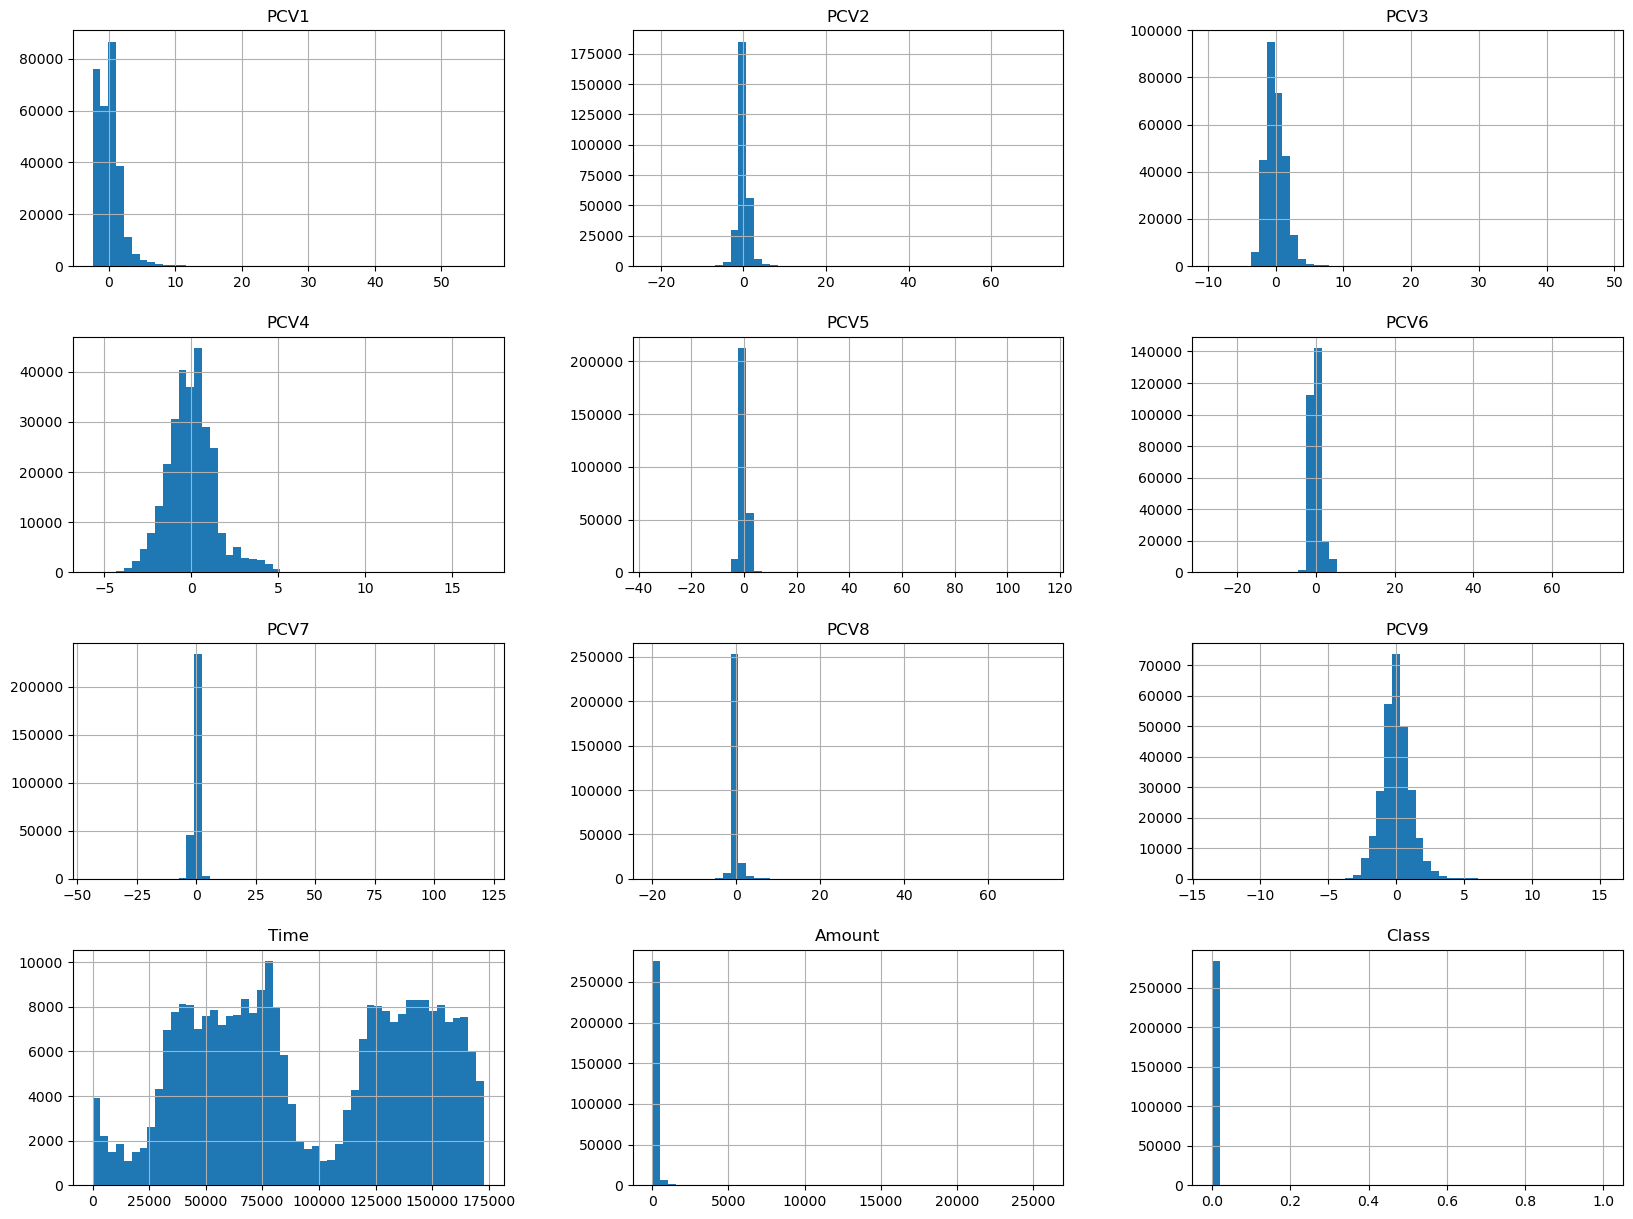

In [83]:
%matplotlib inline 
import matplotlib.pyplot as plt

creditcardtransactionsHuge.hist(bins=50, figsize=(20,15))
plt.show()

#Result numerical: features (mainly v1 to v28) few outliers and similar scales (-3 to 3) 

#### ii) Check for outliers
Identify outliers and anomalies in the data.

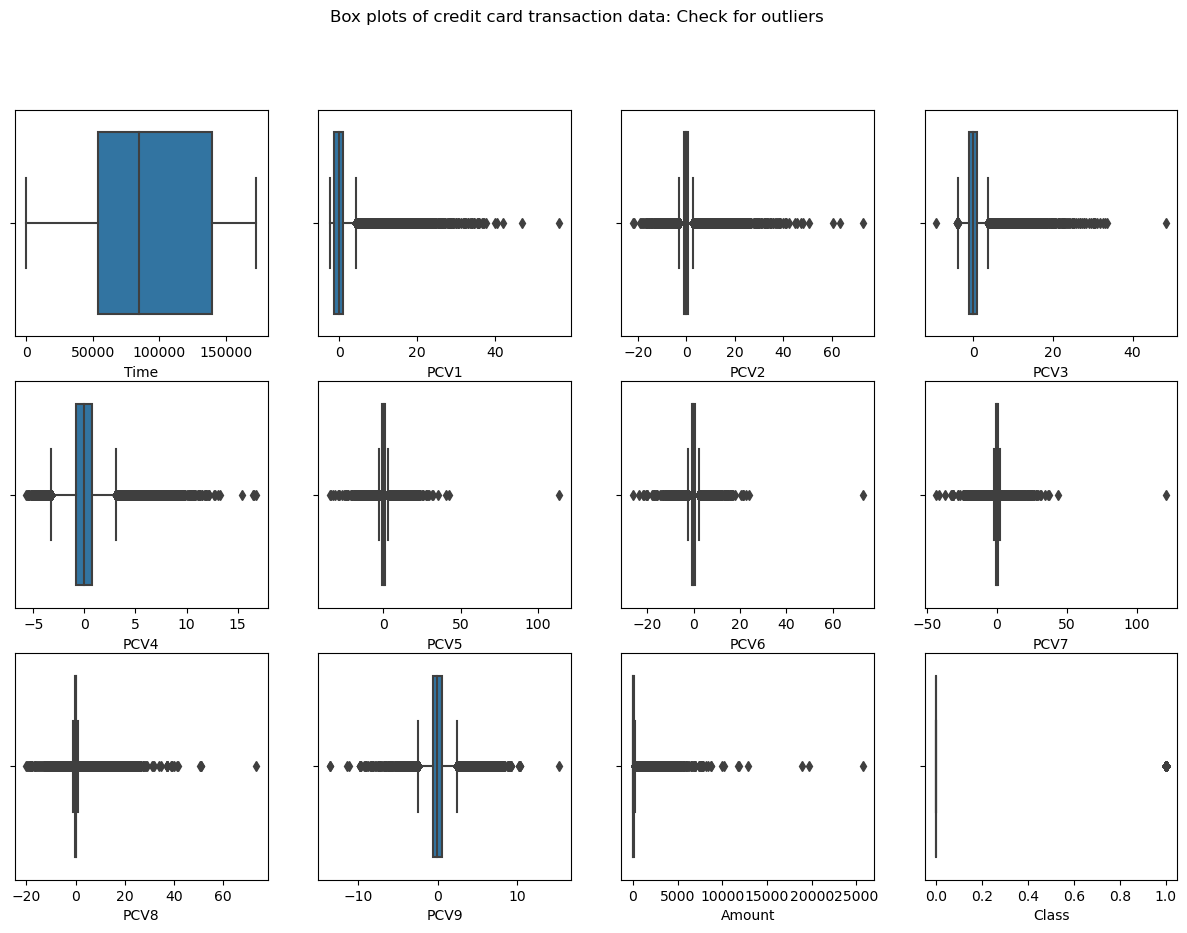

In [84]:
# Check for outliers

# Create a grid of subplots
#fig, axs = plt.subplots(ncols=4, nrows=6, figsize=(15, 10)) # 12,8
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(15, 10))

sns.boxplot(x=creditcardtransactionsHuge['Time'], ax=axs[0, 0])
sns.boxplot(x=creditcardtransactionsHuge['PCV1'], ax=axs[0, 1])
sns.boxplot(x=creditcardtransactionsHuge['PCV2'], ax=axs[0, 2])
sns.boxplot(x=creditcardtransactionsHuge['PCV3'], ax=axs[0, 3])
sns.boxplot(x=creditcardtransactionsHuge['PCV4'], ax=axs[1, 0])
sns.boxplot(x=creditcardtransactionsHuge['PCV5'], ax=axs[1, 1])
sns.boxplot(x=creditcardtransactionsHuge['PCV6'], ax=axs[1, 2])
sns.boxplot(x=creditcardtransactionsHuge['PCV7'], ax=axs[1, 3])
sns.boxplot(x=creditcardtransactionsHuge['PCV8'], ax=axs[2, 0])
sns.boxplot(x=creditcardtransactionsHuge['PCV9'], ax=axs[2, 1])
"""
sns.boxplot(x=creditcardtransactionsHuge['V10'], ax=axs[1, 4])
sns.boxplot(x=creditcardtransactionsHuge['V11'], ax=axs[1, 5])
sns.boxplot(x=creditcardtransactionsHuge['V12'], ax=axs[2, 0])
sns.boxplot(x=creditcardtransactionsHuge['V13'], ax=axs[2, 1])
sns.boxplot(x=creditcardtransactionsHuge['V14'], ax=axs[2, 2])
sns.boxplot(x=creditcardtransactionsHuge['V15'], ax=axs[2, 3])
sns.boxplot(x=creditcardtransactionsHuge['V16'], ax=axs[2, 4])
sns.boxplot(x=creditcardtransactionsHuge['V17'], ax=axs[2, 5])
sns.boxplot(x=creditcardtransactionsHuge['V18'], ax=axs[3, 0])
sns.boxplot(x=creditcardtransactionsHuge['V19'], ax=axs[3, 1])
sns.boxplot(x=creditcardtransactionsHuge['V20'], ax=axs[3, 2])
sns.boxplot(x=creditcardtransactionsHuge['V21'], ax=axs[3, 3])
sns.boxplot(x=creditcardtransactionsHuge['V22'], ax=axs[3, 4])
sns.boxplot(x=creditcardtransactionsHuge['V23'], ax=axs[3, 5])
sns.boxplot(x=creditcardtransactionsHuge['V24'], ax=axs[4, 0])
sns.boxplot(x=creditcardtransactionsHuge['V25'], ax=axs[4, 1])
sns.boxplot(x=creditcardtransactionsHuge['V26'], ax=axs[4, 2])
sns.boxplot(x=creditcardtransactionsHuge['V27'], ax=axs[4, 3])
sns.boxplot(x=creditcardtransactionsHuge['V28'], ax=axs[4, 4])
"""
sns.boxplot(x=creditcardtransactionsHuge['Amount'], ax=axs[2, 2])
sns.boxplot(x=creditcardtransactionsHuge['Class'], ax=axs[2, 3])
"""
axs[0, 0].set_title('Time')
axs[0, 1].set_title('PCV1')
axs[0, 2].set_title('PCV2')
axs[0, 3].set_title('PCV3')
axs[1, 0].set_title('PCV4')
axs[1, 1].set_title('PCV5')
axs[1, 2].set_title('PCV6')
axs[1, 3].set_title('PCV7')
axs[2, 0].set_title('PCV8')
axs[2, 1].set_title('PCV9')
"""
"""
axs[1, 4].set_title('V10')
axs[1, 5].set_title('V11')
axs[2, 0].set_title('V12')
axs[2, 1].set_title('V13')
axs[2, 2].set_title('V14')
axs[2, 3].set_title('V15')
axs[2, 4].set_title('V16')
axs[2, 5].set_title('V17')
axs[3, 0].set_title('V18')
axs[3, 1].set_title('V19')
axs[3, 2].set_title('V20')
axs[3, 3].set_title('V21')
axs[3, 4].set_title('V22')
axs[3, 5].set_title('V23')
axs[4, 0].set_title('V24')
axs[4, 1].set_title('V25')
axs[4, 2].set_title('V26')
axs[4, 3].set_title('V27')
axs[4, 4].set_title('V28')
"""
"""
axs[2, 2].set_title('Amount')
axs[2, 3].set_title('Class')
"""
# Add a title to the entire figure
fig.suptitle('Box plots of credit card transaction data: Check for outliers')
plt.show()

# -> Result: treat outliers - Scaling
# StandardScaler is much less affected by outliers then min-max scaling for standardization 


<Axes: xlabel='PCV2'>

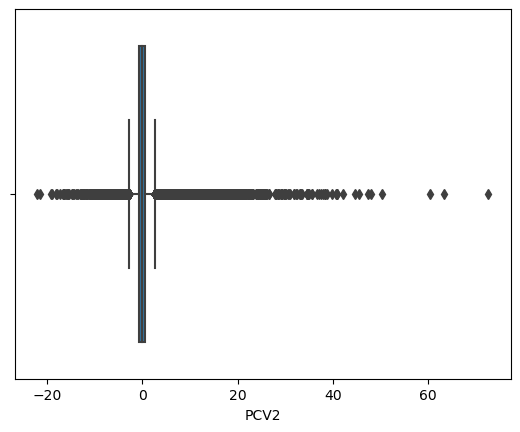

In [85]:
# Check for outliers

sns.boxplot(x=creditcardtransactionsHuge['PCV2'])

<Axes: xlabel='Amount'>

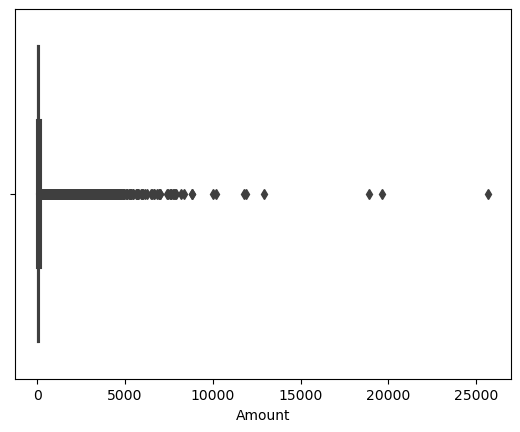

In [86]:
# Check for outliers

sns.boxplot(x=creditcardtransactionsHuge['Amount'])

#### iii) Check for duplicates

In [87]:
duplicates = creditcardtransactionsHuge.duplicated().sum()
print(f"creditcardtransactionsHuge.duplicated().sum() \n {duplicates} \n")

creditcardtransactionsHuge.duplicated().sum() 
 1081 



#### iv) Looking for correlations
identify patterns and relationships in the data. Correlations between variables and create scatter plots to visualize these relationships (multivariate: investigate the relationships between the variables)

In [88]:
corr_matrix = creditcardtransactionsHuge.corr() 
#Now let’s look at how much each attribute correlates with the Class value:
corr_matrix["Class"].sort_values(ascending=False)


Class     1.000000
PCV3      0.193135
PCV4      0.133548
PCV1      0.101340
PCV5      0.095455
Amount    0.005632
Time     -0.012323
PCV8     -0.020249
PCV6     -0.044023
PCV2     -0.091258
PCV9     -0.103475
PCV7     -0.185921
Name: Class, dtype: float64

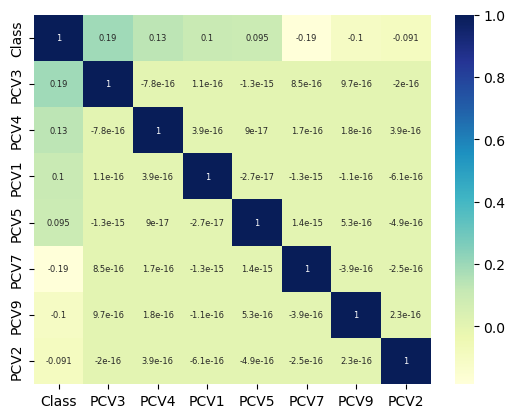

In [89]:
# A heat map is widely been used for Multivariate Analysis
# Heat Map gives the correlation between the variables, whether it has a positive or negative correlation.

# Heatmaps are used to observe the correlations among the feature variables. This is particularly important 
# when we are trying to obtain the feature importance in regression analysis. Although correlated features do not 
# impact the performance of the statistical model, it could mess up the post-modeling analysis.
# Let’s see if there exist any correlation among our features by plotting a heatmap.
# The values in the cells are Pearson’s R values which indicate the correlation among the feature variables. 

# for the most correlated positive and negative
creditcardtransactionsHuge2 = creditcardtransactionsHuge[["Class","PCV3","PCV4","PCV1","PCV5", "PCV7", "PCV9","PCV2"]]

sns.heatmap(creditcardtransactionsHuge2.corr(), cmap = 'YlGnBu', annot = True,annot_kws={"size": 6}) #vmin = -1, vmax = 1
plt.show()

array([[<Axes: xlabel='Class', ylabel='Class'>,
        <Axes: xlabel='PCV3', ylabel='Class'>,
        <Axes: xlabel='PCV4', ylabel='Class'>,
        <Axes: xlabel='PCV1', ylabel='Class'>,
        <Axes: xlabel='PCV7', ylabel='Class'>,
        <Axes: xlabel='PCV9', ylabel='Class'>],
       [<Axes: xlabel='Class', ylabel='PCV3'>,
        <Axes: xlabel='PCV3', ylabel='PCV3'>,
        <Axes: xlabel='PCV4', ylabel='PCV3'>,
        <Axes: xlabel='PCV1', ylabel='PCV3'>,
        <Axes: xlabel='PCV7', ylabel='PCV3'>,
        <Axes: xlabel='PCV9', ylabel='PCV3'>],
       [<Axes: xlabel='Class', ylabel='PCV4'>,
        <Axes: xlabel='PCV3', ylabel='PCV4'>,
        <Axes: xlabel='PCV4', ylabel='PCV4'>,
        <Axes: xlabel='PCV1', ylabel='PCV4'>,
        <Axes: xlabel='PCV7', ylabel='PCV4'>,
        <Axes: xlabel='PCV9', ylabel='PCV4'>],
       [<Axes: xlabel='Class', ylabel='PCV1'>,
        <Axes: xlabel='PCV3', ylabel='PCV1'>,
        <Axes: xlabel='PCV4', ylabel='PCV1'>,
        <Axes: xlabel

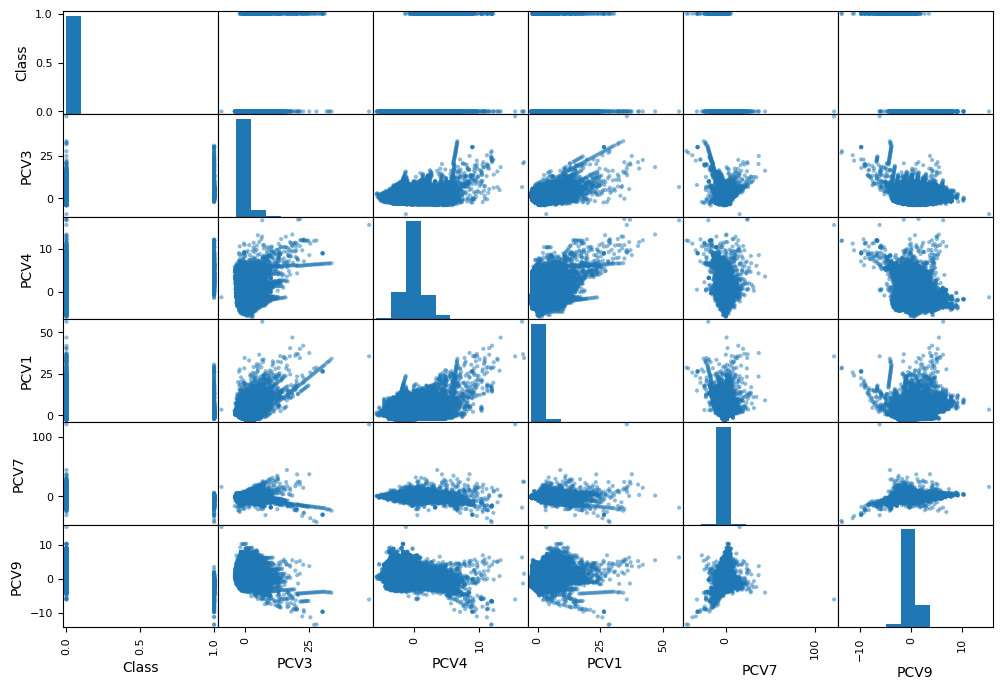

In [90]:
#  let’s just focus on a few promising attributes that seem most correlated with the Class 

from pandas.plotting import scatter_matrix 

attributes = ["Class", "PCV3", "PCV4", "PCV1","PCV7","PCV9"] 
scatter_matrix(creditcardtransactionsHuge[attributes], figsize=(12, 8)) 


<Axes: xlabel='Amount', ylabel='Class'>

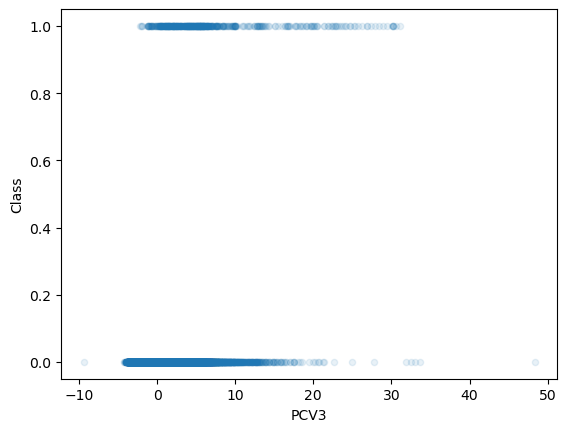

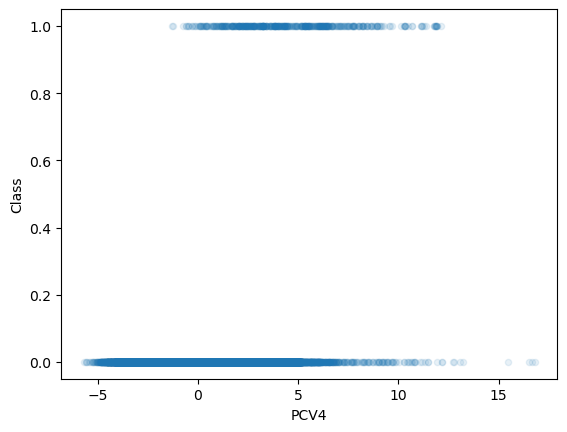

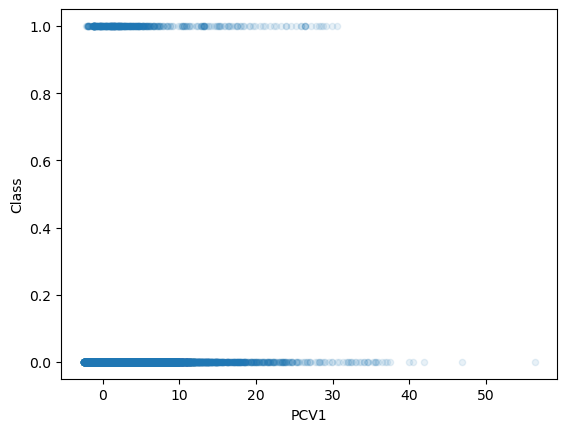

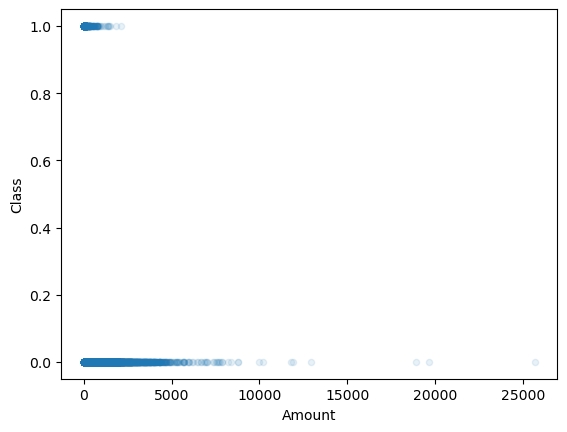

In [91]:
# zoom most promising attribute to predict the Class 
creditcardtransactionsHuge.plot(kind="scatter", x="PCV3", y="Class", alpha=0.1)
# Result V11>5 and < 10 -> Class 1
creditcardtransactionsHuge.plot(kind="scatter", x="PCV4", y="Class", alpha=0.1)
creditcardtransactionsHuge.plot(kind="scatter", x="PCV1", y="Class", alpha=0.1)
creditcardtransactionsHuge.plot(kind="scatter", x="Amount", y="Class", alpha=0.1)
# Result Amount  very low with Class = 1


##### Univariate graphical analysis

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\User\anaconda3\lib\site

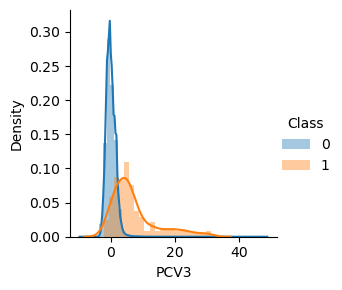

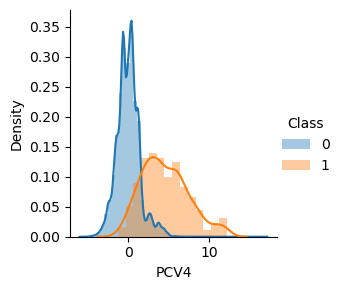

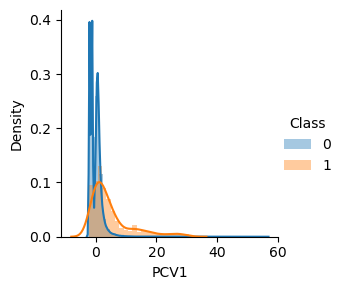

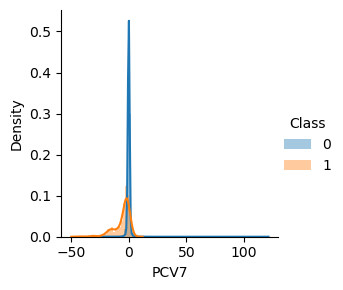

In [92]:
# Distribution Plots (also called probability density function or PDF plots)
# Which among the features is more useful than other variables in order to distinguish between
# the class labels ‘1’ and ‘0’? To answer this, we’ll plot the distribution plots with each feature as a 
#variable on X-axis. The values on the Y-axis in each case represent the normalized density.

sns.FacetGrid(creditcardtransactionsHuge, hue = "Class").map(sns.distplot, "PCV3").add_legend() # distplot displot
sns.FacetGrid(creditcardtransactionsHuge, hue = "Class").map(sns.distplot, "PCV4").add_legend() # distplot displot
sns.FacetGrid(creditcardtransactionsHuge, hue = "Class").map(sns.distplot, "PCV1").add_legend() # distplot displot
sns.FacetGrid(creditcardtransactionsHuge, hue = "Class").map(sns.distplot, "PCV7").add_legend() # distplot displot
plt.show()

# Results: Distinct layers PCV3>~5 <~20 -> Class ~1; PCV4>~3 <~13 -> Class ~1; PCV1>~5 <~20 -> Class ~1; PCV7 ~ 0  same layers but some Class ~1;

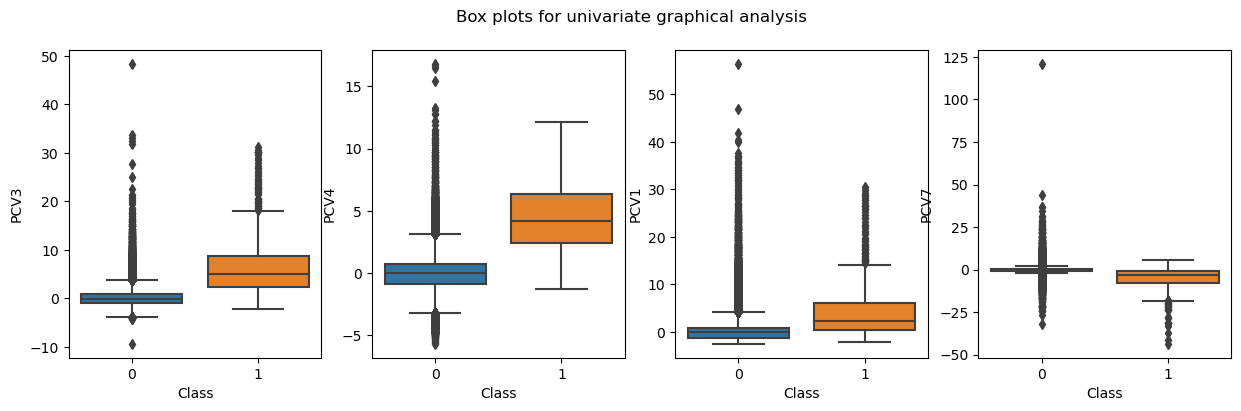

In [93]:
# Box plots Univariate (feature with target)

plt.figure(figsize = (15, 4))
plt.subplot(1,4,1)
sns.boxplot(x = 'Class', y = 'PCV3', data = creditcardtransactionsHuge)
plt.subplot(1,4,2)
sns.boxplot(x = 'Class', y = 'PCV4', data = creditcardtransactionsHuge)
plt.subplot(1,4,3)
sns.boxplot(x = 'Class', y = 'PCV1', data = creditcardtransactionsHuge)
plt.subplot(1,4,4)
sns.boxplot(x = 'Class', y = 'PCV7', data = creditcardtransactionsHuge)

# Add a title to the entire figure
plt.suptitle('Box plots for univariate graphical analysis')
plt.show()


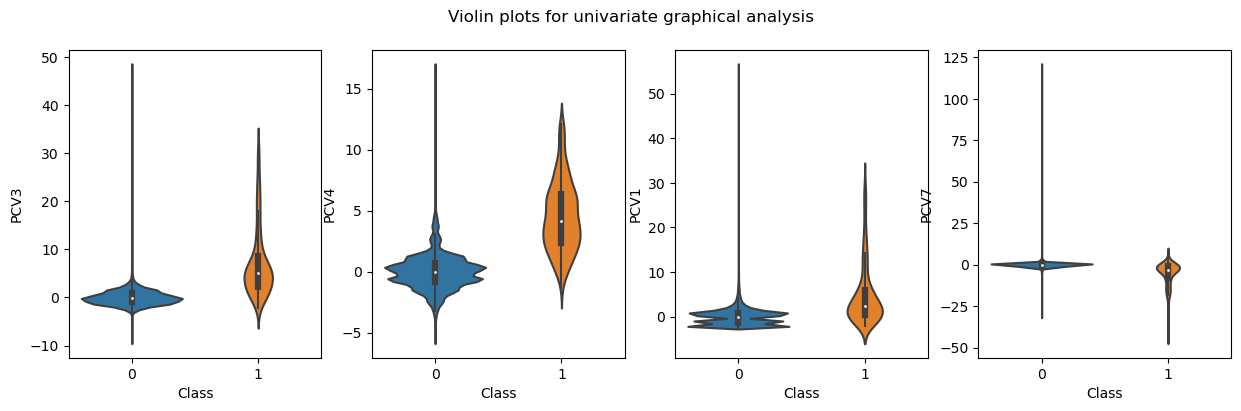

In [94]:
# Violin plots in general are more informative as compared to the box plots as violin plots also represent
# the underlying distribution of the data in addition to the statistical summary. 
plt.figure(figsize = (15, 4))
plt.subplot(1,4,1)
sns.violinplot(x = 'Class', y = 'PCV3', data = creditcardtransactionsHuge)
plt.subplot(1,4,2)
sns.violinplot(x = 'Class', y = 'PCV4', data = creditcardtransactionsHuge)
plt.subplot(1,4,3)
sns.violinplot(x = 'Class', y = 'PCV1', data = creditcardtransactionsHuge)
plt.subplot(1,4,4)
sns.violinplot(x = 'Class', y = 'PCV7', data = creditcardtransactionsHuge)

# Add a title to the entire figure
plt.suptitle('Violin plots for univariate graphical analysis')
plt.show()

# Results: Distinct layers: mainly in PVC3 and PCV4 in relation witn Class: 0,1

####  multivariate (bi-variate): investigate the relationships between the variables
Multivariate/Bivariate: investigate the relationships between the variables,  can be shown with the help of various plots like Scatter Plot, pairplot, Line plot,  Histogram(summary) plot, box plots, violin plot, etc heatmap....


In [95]:
from collections import Counter

# summarize class distribution
counter = Counter(creditcardtransactionsHuge['Class'])
print(counter)
print('Positive class corresponds to', counter[1]/(counter[0]+counter[1])*100,'% of the dataset.')

Counter({0: 284315, 1: 492})
Positive class corresponds to 0.1727485630620034 % of the dataset.


In [96]:
creditcardtransactionsHuge['Class'].value_counts()


0    284315
1       492
Name: Class, dtype: int64

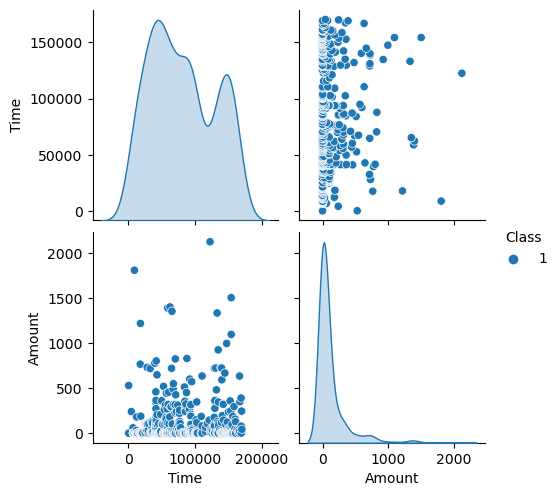

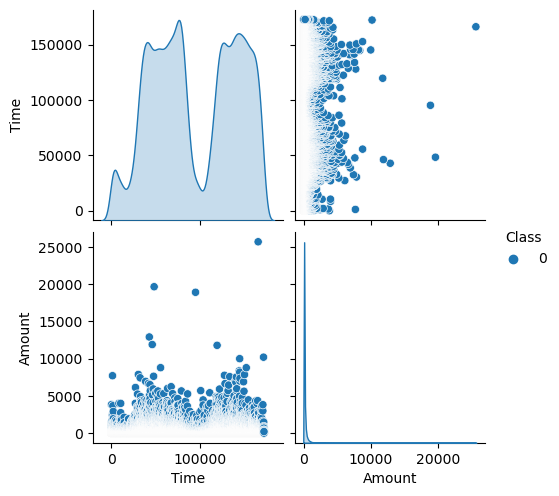

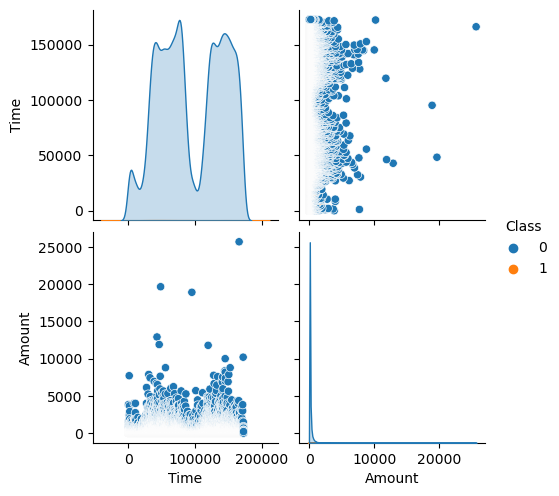

In [97]:
# multivariate: investigate the relationships between the variables
# for frauds
sns.pairplot(creditcardtransactionsHuge [creditcardtransactionsHuge['Class'] == 1], vars=['Time', 'Amount'], hue='Class')
#Result Fraud amount is low mainly 0,00 to 0,02 and lower to 0,004

# for non frauds
sns.pairplot(creditcardtransactionsHuge [creditcardtransactionsHuge['Class'] == 0], vars=['Time', 'Amount'], hue='Class')

# all
sns.pairplot(creditcardtransactionsHuge , vars=['Time', 'Amount'], hue='Class')


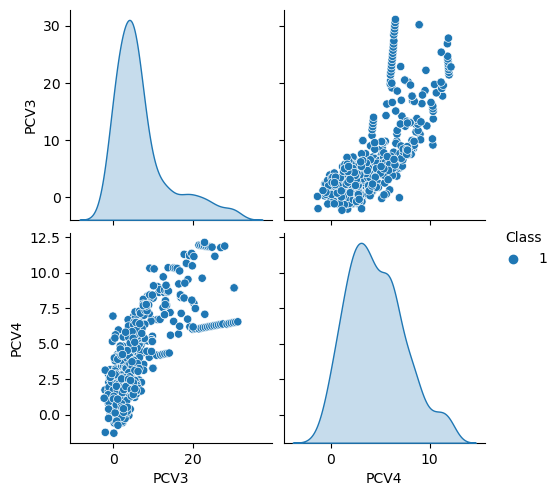

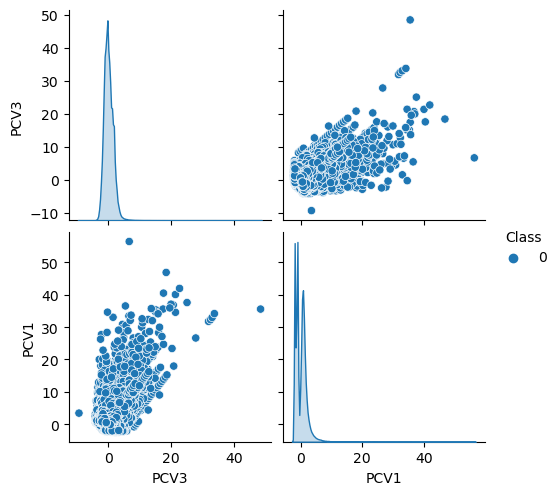

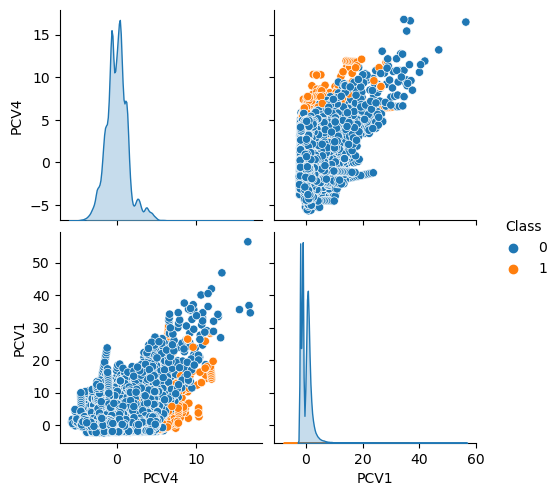

In [98]:
# multivariate: investigate the relationships between the variables
#just for frauds
sns.pairplot(creditcardtransactionsHuge [creditcardtransactionsHuge['Class'] == 1], vars=['PCV3', 'PCV4'], hue='Class')
#Result Fraud amount is low mainly 0,00 to 0,02 and lower to 0,004

#just for non frauds
sns.pairplot(creditcardtransactionsHuge [creditcardtransactionsHuge['Class'] == 0], vars=['PCV3', 'PCV1'], hue='Class')

#all
sns.pairplot(creditcardtransactionsHuge , vars=['PCV4', 'PCV1'], hue='Class')

# Results V11 and V17 for Class = 1 very good....

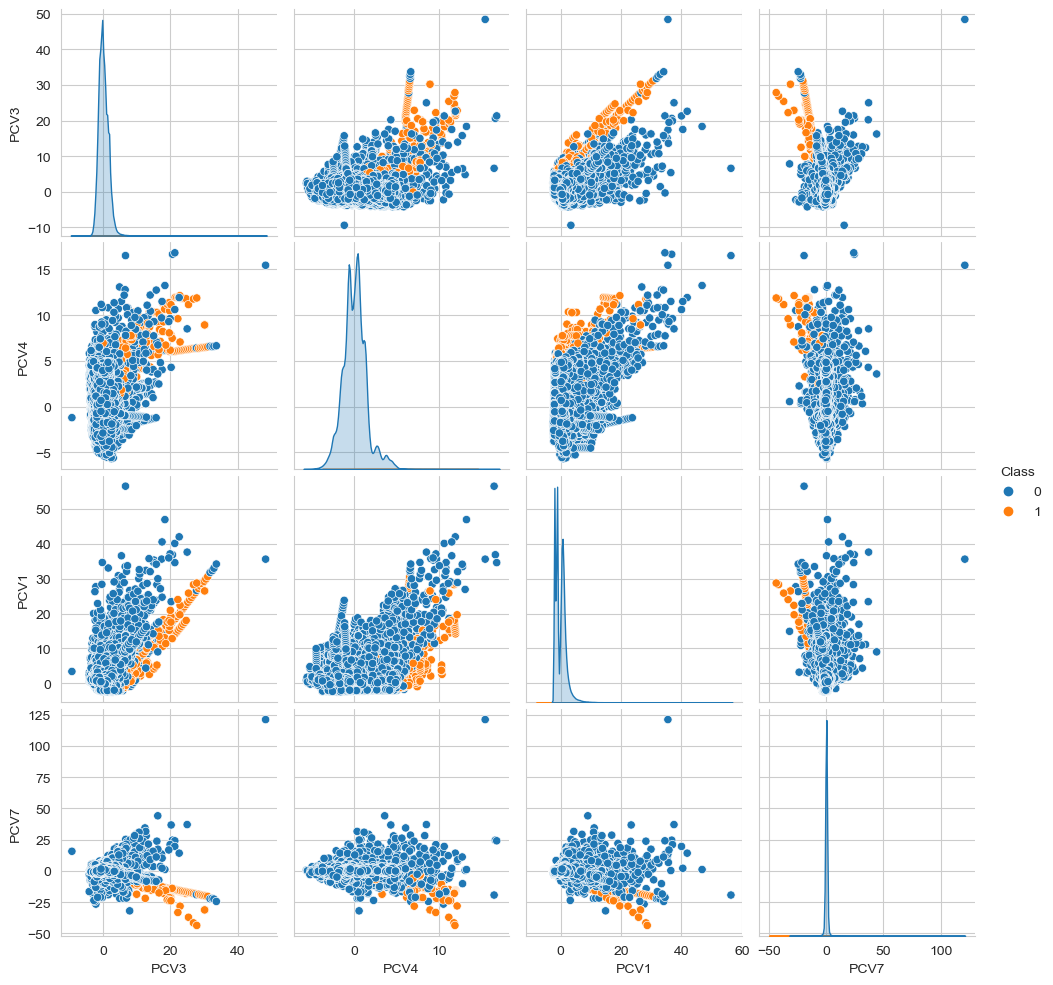

In [99]:
# Pair plot
# Plot a pair plot to visualize the relationship between the features in a pairwise manner. 
# A pair plot enables us to visualize both distributions of single variables as well as the relationship between 
# pairs of variables.

sns.set_style('whitegrid')

#for the most correlated positive and negative
#creditcardtransactionsHuge2 = creditcardtransactionsHuge[["Class","PCV3","PCV4","PCV1","Amount", "PCV", "V14","V12", "V16","V3", "V7"]]
creditcardtransactionsHuge2 = creditcardtransactionsHuge[["Class","PCV3","PCV4","PCV1", "PCV7"]]

sns.pairplot(creditcardtransactionsHuge2, hue = 'Class')
plt.show()

# As we can observe in the above pair plot, there is a low overlap between any two features and hence almoust a clear distinction can be made between the class labels based on the feature pairs.


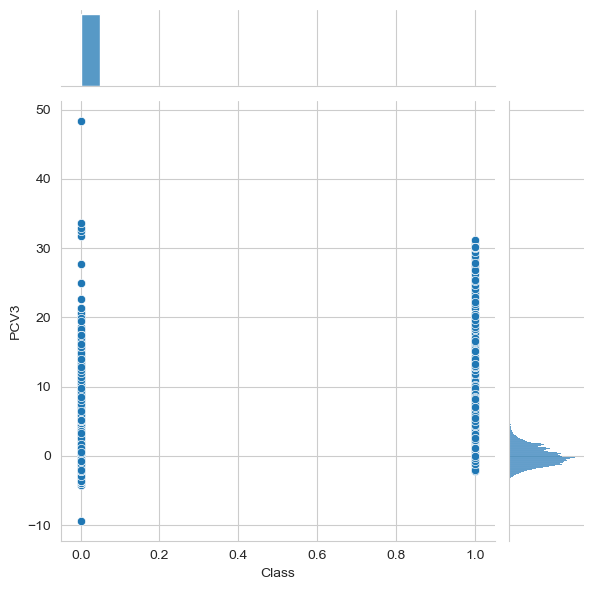

In [100]:
# joint plot (Bi-variate)
# While the Pair plot provides a visual insight into all possible correlations, 
# the Joint plot provides bivariate plots with univariate marginal distributions.
sns.jointplot(x = 'Class', y = 'PCV3', data = creditcardtransactionsHuge)
plt.show()


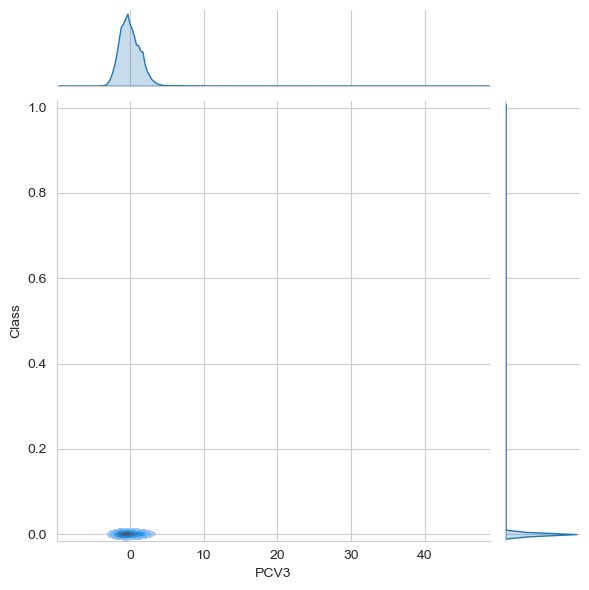

In [101]:
# Multivariate analysis with Contour plot
#Plotting a contour plot using the seaborn library for V11 on x-axis and Class on the y-axis —

sns.jointplot(x = 'PCV3',  y = 'Class' , data = creditcardtransactionsHuge,  kind = 'kde', fill = True)
plt.show()


#### v) Experimenting with Attribute Combinations


#### vi) Findings


# 3) Data preparation
Prepare the data for modeling by cleaning it up and transforming it into a format that can be used by machine learning algorithms.  
- Data Cleaning: Handling missing values and categorical values, removing outliers and duplicates, and ensuring data quality.
- Data Transforming
- Feature Engineering: Transforming variables, creating new features, or selecting relevant variables for analysis.
-- Feature selection: selecting the most useful features to train on among existing features. 
-- Feature extraction: combining existing features to produce a more useful one (e.g. handling missing data, encoding variables, dealing with categorical variables, dimensionality reduction algorithms ...). 
-- Creating new features by gathering new data.
- PCA for reducing features
- Data Visualization after Data Preparation: Presenting insights through plots, charts, and graphs to communicate findings effectively
---

Some of the basic pre-processing techniques:
1. Conversion of data – models can only handle numeric features; hence, categorical and ordinal data must be
somehow converted into numeric features
for instance convert: df['survival_status'] = df['survival_status'].map({1:"yes", 2:"no"})
Results-> All numerical
2. Scaling data – many modelling approaches require some uniformity in the independent variables. Some datasets
Results-> have outliers that may totally disrupt model results.
 - Common scaling methods: standardisation, range scaling, power transform, unit norm scaling, custom scaling
Results-> numeric need scaling with outliers
3. Missing values – do nothing, ignore or impute them.
Results-> There isn´t
4. Outliers detection – there are some error data that might be present in our dataset that deviates drastically from
other observations in a dataset (for example, human weight = 800kg; due to mistyping of extra 0)
Results-> scaling
5. Check for duplicates
Results-> There is

- Ensuring data quality

Apply transformers to atributes in dataframe in order to preprocessing and features extraction
- Handling Text and Categorical Attributes (01) - No need      
- Scaling (02) (04) to all numerical: StandardScaler (is much less affected by outliers then min-max scaling)
- Data Cleaning (03) NA - Missing values, no need
- Data Cleaning (05) Duplicates
 
 

In [102]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Check for missing values
print(f"creditcardtransactionsHuge.isnull().sum() \n {creditcardtransactionsHuge.isnull().sum()} \n")

# Check for duplicates
duplicates = creditcardtransactionsHuge.duplicated().sum()
print(f"creditcardtransactionsHuge.duplicated().sum() \n {duplicates} \n")
if duplicates > 0:
    # Remove duplicates
    creditcardtransactionsHuge.drop_duplicates(inplace=True) #modify the original dataframe instead of creating a new one. 
    print(f"After remove duplicates creditcardtransactionsHuge.duplicated().sum() \n {creditcardtransactionsHuge.duplicated().sum()} \n")
    print ( f" \n creditcardtransactionsHuge shape {creditcardtransactionsHuge.shape} \n")

# Select the columns you want to scale
creditcardtransactionsHuge_Num = creditcardtransactionsHuge.drop(['Class', 'Time'], axis=1) #Amount is numerical
num_attribs = list(creditcardtransactionsHuge_Num) # have a list of attributes to apply transformer, first drop attributes not numerical…..correct
print (f"num_attribs -> {num_attribs}")
       
columns_to_scale = num_attribs

#See CHD focus on the colum and not on the operation.....Important

column_trans = ColumnTransformer(
    [       
       ('scaler', StandardScaler(), columns_to_scale)
    ]
)

print ("column_trans.fit_transform(creditcardtransactionsHuge): apply to dataframe creditcardtransactionsHuge ", column_trans.fit_transform(creditcardtransactionsHuge)) #apply transformers to all dataframe contratsAPFit
print ("column_trans.get_feature_names_out(): features that have been created with preprocessing and feature extraction extract ", column_trans.get_feature_names)
# i´m not making any attribution of value to the return of column_trans just using the values
# to see how is the transformation
"""
#Not expect for pipeline in fit and aplly right now some data transformations....
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale the 'Amount' feature (0,1)
creditcardtransactionsHuge['Amount'] = scaler.fit_transform(creditcardtransactionsHuge[['Amount']]) #a 2D array expected so [[]]
"""


creditcardtransactionsHuge.isnull().sum() 
 PCV1      0
PCV2      0
PCV3      0
PCV4      0
PCV5      0
PCV6      0
PCV7      0
PCV8      0
PCV9      0
Time      0
Amount    0
Class     0
dtype: int64 

creditcardtransactionsHuge.duplicated().sum() 
 1081 

After remove duplicates creditcardtransactionsHuge.duplicated().sum() 
 0 

 
 creditcardtransactionsHuge shape (283726, 12) 

num_attribs -> ['PCV1', 'PCV2', 'PCV3', 'PCV4', 'PCV5', 'PCV6', 'PCV7', 'PCV8', 'PCV9', 'Amount']
column_trans.fit_transform(creditcardtransactionsHuge): apply to dataframe creditcardtransactionsHuge  [[ 0.70114032  0.0415646  -1.68007946 ... -0.08325784  0.35108238
   0.24419951]
 [-0.60891337 -0.16388541 -0.1100666  ... -0.07877279 -0.26313148
  -0.34258399]
 [ 0.70054498  0.81119848 -1.1725662  ... -0.21113989 -1.3255937
   1.15889967]
 ...
 [-0.98226629  0.18044081  2.15611859 ... -0.59715599  0.43116422
  -0.0822395 ]
 [ 0.12665767 -0.32514279 -0.46509505 ... -0.57113703  0.42521286
  -0.31339058]
 [ 0.

"\n#Not expect for pipeline in fit and aplly right now some data transformations....\n# Create a MinMaxScaler object\nscaler = MinMaxScaler()\n\n# Scale the 'Amount' feature (0,1)\ncreditcardtransactionsHuge['Amount'] = scaler.fit_transform(creditcardtransactionsHuge[['Amount']]) #a 2D array expected so [[]]\n"

# 4) Modeling / Select and Train Models
Create a model that can be used to make predictions or classify new data. 
- Retrieve Class (y) from the dataset (X)
- Split Data
- Normal Test
- OverSampling (SMOTE) and undersampling (need for?)
- Calculate the weights for each sample based on the feature (transaction amount) and class weight (need for?)
- Intermediate Results (need for?)
- Train model (w/cross-validate) (based on OverSampling (SMOTE) and undersampling) (need for?)

## Retrieve Class (y) from the dataset (X)

Separate the features and target variable

In [103]:
# Separate the features and target variable
creditcardtransactions = creditcardtransactionsHuge.drop(['Class'], axis=1) #axis by default is 0 (drop a line) set to  1 (column)
y = creditcardtransactionsHuge['Class'] # targuet .copy()?

print ( f"creditcardtransactions shape \n {creditcardtransactions.shape} \n")
print ( f"creditcardtransactions.describe() \n {creditcardtransactions.describe()} \n")

# show first 5 column
print (f"creditcardtransactions.head() \n {creditcardtransactions.head()}")

print ( f"y shape \n {y.shape} \n")
# show first 5 column
print (f"y.head() \n {y.head()}")

creditcardtransactions shape 
 (283726, 11) 

creditcardtransactions.describe() 
                 PCV1           PCV2           PCV3           PCV4  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.005917       0.004135      -0.001614      -0.002968   
std         1.948027       1.646706       1.508670       1.414179   
min        -2.454822     -22.073406      -9.375262      -5.681583   
25%        -1.316244      -0.800320      -1.026721      -0.850483   
50%        -0.020390      -0.063930      -0.180684      -0.022410   
75%         0.916043       0.600192       0.889299       0.739405   
max        56.405407      72.715837      48.368620      16.812292   

                PCV5           PCV6           PCV7           PCV8  \
count  283726.000000  283726.000000  283726.000000  283726.000000   
mean       -0.001830      -0.001137       0.001796       0.000855   
std         1.376991       1.331911       1.227714       1.179141   
min       -34.805676

## Split Data
Let's split the data into train and test sets.

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(creditcardtransactions, y, test_size=0.3, random_state=42)

In [105]:
print ( f"X_train \n {X_train} \n len X_train {len (X_train)}" )
print (f"X_train.shape {X_train.shape}")
print ( f"y_train \n {y_train} \n len y_train {len (y_train)}")
print (f"y_train.shape {y_train.shape}")

print ( f"X_train.info() \n {X_train.info()}")
print ( f"y_train.info() \n {y_train.info()}")

# summarize class distribution
counter = Counter(y_train)
print(counter)
print('In Training DataSet Positive class corresponds to', counter[1]/(counter[0]+counter[1])*100,'% of the dataset.')

X_train 
             PCV1      PCV2      PCV3      PCV4      PCV5      PCV6      PCV7  \
9303   -1.062694  0.006871 -1.169492  1.696281  0.556504  0.525220 -0.611130   
76408  -0.847938  0.339160  0.189250  0.644104  0.183847 -0.716714  0.632707   
241084 -0.128185  0.515991  0.144511 -0.928332 -0.527084 -0.707330  0.008359   
51506   0.681276  3.311211  0.269165  1.178345  0.763813  2.589583  0.227544   
30861  -1.268827 -0.069854 -0.332638  0.725916  0.313849 -0.439752 -0.029842   
...          ...       ...       ...       ...       ...       ...       ...   
120348  0.187977  3.244616  1.080577  0.135196  1.623903 -0.515240  0.775851   
260136 -0.149538 -0.988415  0.602878 -0.787859 -1.241154 -0.207751  0.861294   
132427 -1.259383  0.049975  0.722289  0.071768 -1.862677  3.637983 -0.821923   
147428 -1.983116  0.134728  1.160278  0.473067  0.043561 -1.085003  0.311351   
122429  0.464847 -0.817952 -1.327219 -1.344792 -0.582768 -0.687625  0.861041   

            PCV8      PCV9   

## Normal Test
Before 
- OverSampling (SMOTE) and undersampling
- Calculate the weights for each sample based on the feature (transaction amount) and class weight
 which results can i get?

In [106]:
# before SMOTE which result can i manage?

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report

clf_1 = DecisionTreeClassifier()
clf = Pipeline(
        steps=[("preprocessor", column_trans), ("classifier", clf_1 )]
)
 
clf.fit(X_train, y_train)
print (f"clf \n {clf}")

Y_pred = clf.predict(X_test) 
print(classification_report(y_test, Y_pred))

clf 
 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['PCV1', 'PCV2', 'PCV3',
                                                   'PCV4', 'PCV5', 'PCV6',
                                                   'PCV7', 'PCV8', 'PCV9',
                                                   'Amount'])])),
                ('classifier', DecisionTreeClassifier())])
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.58      0.49      0.53       134

    accuracy                           1.00     85118
   macro avg       0.79      0.74      0.76     85118
weighted avg       1.00      1.00      1.00     85118



## OverSampling (SMOTE) and undersampling
OverSampling and undersampling

The application of SMOTE has some disadvantages, such as:
* While generating synthetic examples, SMOTE does not take into consideration neighboring examples that can be from other classes. This can increase the overlapping of classes and can introduce additional noise.
* SMOTE is not very practical for high-dimensional data.

However, the application of random undersampling alone has some disadvantages too, such as:
* Removing enough majority examples to make the majority class the same or similar size to the minority class results in a significant loss of data.
* The sample of the majority class chosen could be biased, meaning, it might not accurately represent the real world, and the result of the analysis may be inaccurate. Therefore, it can cause the classifier to perform poorly on real unseen data.

Because of these disadvantages, some scientists might prefer oversampling. It doesn't lead to any loss of information, and in some cases, may perform better than undersampling. But oversampling isn't perfect either. Because oversampling often involves replicating minority events, it can lead to overfitting.

So, according to the authors of SMOTE: "The combination of SMOTE and under-sampling performs better than plain under-sampling."

Let's try applying SMOTE and random undersampling to our dataset.

In [107]:
# SMOTE: “synthetic” examples rather than over-sampling with replacement" plus random undersampling

# column_trans d´ont apply  now just with fit to apply the data transformation and then apply fit
# pipeline with column_trans, feature selection, clf..... 

from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where


print (f"X_train.shape {X_train.shape}")
print (f"y_train.shape {y_train.shape}")

over = SMOTE(sampling_strategy=0.1, k_neighbors = 5)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
# steps = [('ct', column_trans), ('o', over), ('u', under)] # adding column_trans 
pipeline = Pipeline(steps=steps)

# transform the dataset
# SMOTE cannot handle more than 15 columns in your data frame. 
# More then 15 columns cause issues in SMOTE and a "None Type" exception will raise
X_retrain, y_retrain = pipeline.fit_resample(X_train, y_train)

print (f"SMOTE plus  random undersampling above X_train.shape {X_train.shape} and  y_train.shape {y_train.shape} ")
print (f"X_retrain.shape \n {X_retrain.shape}")
print (f"X_retrain \n {X_retrain} len  X_retrain {len ( X_retrain)}")
print (f"y_retrain.shape \n {y_retrain.shape}")
print (f"y_retrain \n {y_retrain} len y_retrain {len (y_retrain)}")

# summarize the new class distribution
counter = Counter(y_retrain)
print(counter)
print('Positive class corresponds to', counter[1]/(counter[0]+counter[1])*100,'% of the dataset.')

# Visualize the data
#just for frauds
#sns.pairplot(creditcardtransactions [creditcardtransactions['Class'] == 1], vars=['Time', 'Amount'], hue='Class')

#just for non frauds
#sns.pairplot(creditcardtransactions [creditcardtransactions['Class'] == 0], vars=['Time', 'Amount'], hue='Class')

#all
#sns.pairplot(creditcardtransactions , vars=['Time', 'Amount'], hue='Class')


#classification report
clf.fit(X_retrain,y_retrain)
print (f"clf \n {clf}")

Y_pred = clf.predict(X_test) 
print(classification_report(y_test, Y_pred))


X_train.shape (198608, 11)
y_train.shape (198608,)
SMOTE plus  random undersampling above X_train.shape (198608, 11) and  y_train.shape (198608,) 
X_retrain.shape 
 (59478, 11)
X_retrain 
            PCV1      PCV2      PCV3      PCV4      PCV5      PCV6      PCV7  \
0     -1.175146  0.726519  0.079084 -0.164635 -1.165469  4.380072 -1.466325   
1     -0.202294 -0.754642 -0.064254 -0.743922 -0.902879 -0.123542  0.788911   
2      0.246945 -1.100635  0.386874 -0.720371 -0.455464 -0.739921  0.676999   
3     -1.454138  1.044970 -0.299588 -1.565556  1.129417 -0.038254 -1.082365   
4     -0.777039  1.137303 -0.738159  0.258814  1.317494  0.040242 -0.598253   
...         ...       ...       ...       ...       ...       ...       ...   
59473  2.917743 -0.082722  1.774788  1.469127  2.552215 -0.084649 -0.414961   
59474  3.877934  3.587920  1.834866  4.988931 -4.906714 -3.237088 -3.675633   
59475  4.179430 -2.911023  3.745793  2.130672  1.075219 -1.010132 -1.989619   
59476  0.910592 -3.71

## Calculate the weights for each sample based on the feature (transaction amount) and class_weight

Weights for train dataset
By setting it to "balanced", scikit-learn will automatically calculate weights to assign to class "0" and class "1" such 
that 50% of the loss comes from class "0" and 50% from class "1".

Class_weight is used to adjust the weights of different classes in the dataset. 
It is useful when the dataset is imbalanced, i.e., when some classes have significantly 
more samples than others. By default, most machine learning algorithms assume that all classes have equal weigh

Sample_weight allows you to assign higher weights to important or difficult samples 
and lower weights to unimportant or easy samples, which can improve the performance of the model.


In [108]:
# Calculate the weights for each sample based on the transaction amount

# original dataset X_train, y_train (only on traininng dataset)
# SMOTE Dataset X_retrain, y_retrain (only on traininng dataset)

from sklearn.utils.class_weight import compute_sample_weight

class_weight = {0: 1, 1: 588} # to represent 0,17% for 1 in y (without SMOTE...)
#weights_train = compute_sample_weight(class_weight='balanced', y=y_train) # sample_weight=X_train['Amount'])
weights_train = compute_sample_weight(class_weight=class_weight, y=y_train) # sample_weight=X_train['Amount'])

print(f"weights_train {weights_train}")
#weights for retrain dataset with SMOTE
# weights_retrain = compute_sample_weight(class_weight='balanced', y=y_retrain) # sample_weight=X_retrain['Amount'])
weights_retrain = compute_sample_weight(class_weight=class_weight, y=y_retrain) # sample_weight=X_retrain['Amount'])
print(f"weights_retrain {weights_retrain}")

#Train a DecisionTree model with example-dependent cost-sensitive learning
# clf_weights = DecisionTreeClassifier(class_weight='balanced') # , solver='liblinear')
clf_weights = DecisionTreeClassifier(class_weight=class_weight) # Class Weight # solver='liblinear')

clf = Pipeline(
        steps=[("preprocessor", column_trans), ("classifier", clf_weights )]
)

#weights for train dataset
#clf.fit(X_train, y_train, sample_weight=weights_train)
# clf.fit(X_train, y_train, classifier__sample_weight=weights_train)
clf.fit(X_train, y_train, classifier__sample_weight=X_train['Amount']) #Sample_Weights 

Y_pred = clf.predict(X_test) 
print(f"classification_report Weights X_train, y_train {classification_report(y_test, Y_pred)}")

#weights for retrain dataset with SMOTE
# clf.fit(X_retrain, y_retrain, sample_weight=weights_retrain)
#clf.fit(X_retrain, y_retrain, classifier__sample_weight=weights_retrain)
clf.fit(X_retrain, y_retrain, classifier__sample_weight=X_retrain['Amount']) #Sample_Weights 


Y_pred = clf.predict(X_test) 
print(f"classification_report Weights X_retrain, y_retrain with SMOTE {classification_report(y_test, Y_pred)}")
       


weights_train [1. 1. 1. ... 1. 1. 1.]
weights_retrain [  1.   1.   1. ... 588. 588. 588.]
classification_report Weights X_train, y_train               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.56      0.50      0.53       134

    accuracy                           1.00     85118
   macro avg       0.78      0.75      0.76     85118
weighted avg       1.00      1.00      1.00     85118

classification_report Weights X_retrain, y_retrain with SMOTE               precision    recall  f1-score   support

           0       1.00      0.99      0.99     84984
           1       0.10      0.72      0.18       134

    accuracy                           0.99     85118
   macro avg       0.55      0.85      0.59     85118
weighted avg       1.00      0.99      0.99     85118



## Intermediate Results

    precision    recall  f1-score   support
a) normal test
1       0.58      0.49      0.53       134

b) SMOTE
1       0.09      0.74      0.16       134


c) Class Weight 588 + Sample_Weights in fit (pipeline ): Calculate the weights for each sample based on the transaction amount
1       0.56      0.50      0.53       134

d)   b)SMOTE (does not have much sense because Class Weight and Sample_Weights are similar to SMOTE....
1       0.10      0.72      0.18       134

Final Test (SMOTE)
1       0.13      0.80      0.23       134



# 5) Evaluation 
We evaluate the model’s performance and determine whether it meets the business objectives.
- Evaluation using cross-validate
- Fine-tune Models  
- Model Evaluation on Test Set


## Evaluation using cross-validate (based on OverSampling (SMOTE) and undersampling)
With X_retrain, y_retrain
with Calculate the weights for each sample based on the feature (transaction amount) and class_weight

CV to choose 2 to 3 models per  Classification, with best scores:

Classification scores:
- Precision is the ratio of true positives to the total number of predicted positives. It measures how many of the predicted positive instances are actually positive. A high precision score indicates that the model is good at predicting positive instances.

- Recall is the ratio of true positives to the total number of actual positives. It measures how many of the actual positive instances are correctly predicted as positive. A high recall score indicates that the model is good at identifying positive instances.

- F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall. A high F1 score indicates that the model is good at both predicting and identifying positive instances.

- Matthews correlation coefficient (MCC) is a metric that is used to evaluate the performance of a classification model. It takes into account true positives, true negatives, false positives, and false negatives and produces a score between -1 and 1. A score of 1 indicates perfect prediction, 0 indicates random prediction, and -1 indicates total disagreement between prediction and observation 



In [112]:
# CV to choose 2 to 3 models per type of goal (Regression and/or Classification)

from sklearn.metrics import classification_report

## Classification Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score

from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error

## Regression Models 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
import numpy as np

#Constants to identify type of model/challenge
REGRESSION = 1
CLASSIFICATION = 2

# Number of models, by type (regressions and classification), that will be fine tuned
N_FINETUNE_MODELS_TYPE = 2

# Number of final reports to print from results, with test dataset
N_FINAL_REPORT = 1

# Save the model scores and present intermediate results (w/ verbose)
# Return the list with the saved scores 
def save_scores(best_estimator, scores, name, results,model_type, verbose):
    if verbose:
        if model_type == CLASSIFICATION:
            print(f"\n {name}")
            print("Precision scores:", scores['test_precision'])
            print("Recall scores:", scores['test_recall'])
            print("f1 scores:", scores['test_f1'])

            print("Scores:", scores)

            print("Mean precision:", np.mean(scores['test_precision']))
            print("Mean recall:", np.mean(scores['test_recall']))
            print("Mean f1:", np.mean(scores['test_f1']))

            print("Standard deviation precision:", np.std(scores['test_precision']))
            print("Standard deviation recall:", np.std(scores['test_recall']))
            print("Standard deviation f1:", np.std(scores['test_f1']))
        elif model_type == REGRESSION:
            print (f"Regression in save score model_type {model_type}")
            
            print("R-squared (r2) scores:", scores['test_r2'])
            print("Mean Absolute Error (MAE) scores:", scores['test_neg_mean_absolute_error'])
            print("Mean Squared Error (MSE) scores:", scores['test_neg_mean_squared_error'])
            print("Median Absolute Error scores:", scores['test_neg_median_absolute_error'])
    
            print("Mean R-squared (r2) score:", scores['test_r2'].mean())
            print("Mean Mean Absolute (MAE) Error score:", scores['test_neg_mean_absolute_error'].mean())
            print("Mean Mean Squared (MSE) Error score:", scores['test_neg_mean_squared_error'].mean())
            print("Mean Median Absolute Error score:", scores['test_neg_median_absolute_error'].mean())
    
            print("Standard deviation of R-squared (r2) score:", scores['test_r2'].std())
            print("Standard deviation of Mean Absolute (MAE) Error score:", scores['test_neg_mean_absolute_error'].std())
            print("Standard deviation of Mean Squared (MSE) Error score:", scores['test_neg_mean_squared_error'].std())        
            print("Standard deviation of Median Absolute Error score:", scores['test_neg_median_absolute_error'].std())
                
    # after verbose save results
    
    if model_type == CLASSIFICATION:
        results.append((name,
                    best_estimator,
                    np.mean(scores['test_precision']), # mean because is test_precision for all the k cv
                    np.mean(scores['test_recall']),
                    np.mean(scores['test_f1']),
                    np.std(scores['test_precision']),
                    np.std(scores['test_recall']),
                    np.std(scores['test_f1']),
                    ))
    elif model_type == REGRESSION:
        # print (f"Regression in save score 2 model_type {model_type}")
        results.append((name,
                   best_estimator,
                    scores['test_r2'].mean(),
                    - scores['test_neg_mean_absolute_error'].mean(),   #positive  scores
                    - scores['test_neg_mean_squared_error'].mean(),    #positive  scores
                    - scores['test_neg_median_absolute_error'].mean(), #positive  scores
                    scores['test_r2'].std(),
                    scores['test_neg_mean_absolute_error'].std(),
                    scores['test_neg_mean_squared_error'].std(),
                    scores['test_neg_median_absolute_error'].std(),
                    ))
    return results


# Sort results and return the sorted result
def sort_results (results,model_type):

    # sorted() is a built-in Python function that sorts an iterable object (e.g., list, tuple, etc.) in 
    # ascending order by default. It can also sort in descending order if the reverse=True argument is passed.
    # In this case, sorted() is used to sort the results list of tuples by the fourth element of each tuple (i.e., F1 score)
    # in descending order. The key argument is set to a lambda function that returns the second element of each tuple. 
    # The reverse=True argument is also passed to sort in descending order.
    
    if model_type == CLASSIFICATION:

        # CLASSIFICATION: Sort models by Highest F1 scores (decreasing)
        results_sorted = sorted(results, key=lambda x: x[4], reverse=True)

    elif model_type == REGRESSION:
        
        # REGRESSION: Sort models by lowest MSE scores (increasing)
        results_sorted = sorted(results, key=lambda x: x[4], reverse=False)
        
    return results_sorted

# Execute final report for N_FINAL_REPORT models
def display_final_report (X_train, y_train, X_test, y_test, results,model_type):
    for n_model in range (N_FINAL_REPORT): # apply only to the first N_FINAL_REPORT 
        best_estimator = results[n_model][1] # best estimator model to obtain classification report
        best_estimator.fit(X_train, y_train)            
        y_pred = best_estimator.predict(X_test)
        print (f"\n best_estimator for X_test, {best_estimator}")
        if model_type == CLASSIFICATION:
            print(classification_report(y_test, y_pred))
            print("\n Matthews correlation coefficient (MCC) score:", matthews_corrcoef(y_test, y_pred))
            #  in cv: make_scorer to create a scorer object for MCC and pass it to the scoring parameter
        elif model_type == REGRESSION:
            final_r2 = r2_score(y_test, y_pred)            
            final_mae = mean_absolute_error(y_test, y_pred)
            final_mse = mean_squared_error(y_test, y_pred)
            #final_rmse = np.sqrt(final_mse)
            neg_median_absolute_error = median_absolute_error(y_test, y_pred)
            print(f" r2: {final_r2:.4f} mae: {final_mae:.4f} mse: {final_mse:.4f} neg_median_absolute_error: {neg_median_absolute_error:.4f}")
            pearson = np.corrcoef(y_test, y_pred)[0][1]
            print("Pearson correlation coefficient score:", pearson)

# Display the model final scores. Receives the ordered results to present
def display_scores (results,model_type):        
    
    noshow = ""
    if model_type == CLASSIFICATION:

        print (f"\n--------------------------Results for Classification Models Performance--------------------------")
        for res in results:
            name = res[0]
            precision = res[2] # [1] is best_estimator
            recall = res[3]
            f1 = res[4]
            std_precision = res[5]
            std_recall = res[6]
            std_f1 = res[7]

            print(f"{name.ljust(25)} | precision     {precision:.4f} | recall     {recall:.4f} | f1     {f1:.4f}")
            print(f"{noshow.ljust(25)} | std_precision {std_precision:.4f} | std_recall {std_recall:.4f} | std_f1 {std_f1:.4f}")
    
    elif model_type == REGRESSION:
        
        print (f"\n--------------------------Results for Regression Models Performance--------------------------")
        for res in results:
            name = res[0]
            r2 = res[2] # [1] is best_estimator
            MAE = res[3] 
            MSE = res[4] 
            median_absolute_error = res[5] 
            std_r2 = res[6]
            std_MAE = res[7]
            std_MSE = res[8]
            std_median_absolute_error = res[9]

            print(f"{name.ljust(25)} | r2     {r2:.4f} | MAE     {MAE:.4f} | MSE     {MSE:.4f} | median_absolute_error     {median_absolute_error:.4f}")
            print(f"{noshow.ljust(25)} | std_r2 {std_r2:.4f} | std_MAE {std_MAE:.4f}  | std_MSE {std_MSE:.4f}  | std_median_absolute_error     {std_median_absolute_error:.4f}")

            
# Test (w/ cross validate) a list of models (regression, classification) and present the results (sorted)
# Return results updated
def test_models (column_trans, models,scoring, X_train, y_train,cv_k,results,model_type, verbose):
    for name, estimator in models:
        est = estimator
        ### pipeline
        clf = Pipeline(
        steps=[("preprocessor", column_trans), ("classifier", est )]
        )
        scores = cross_validate(clf, X_train, y_train, cv=cv_k, scoring=scoring)
        #print(f"em test_models antes de chamar save_scores CLASSIFICATION: {CLASSIFICATION} e model_type: {model_type}")
        # results = save_scores (est, scores, name, results,model_type, verbose)
        results = save_scores (clf, scores, name, results,model_type, verbose) #pipeline clf instead of est to be saved
    results = sort_results (results,model_type)
    display_scores (results,model_type)
    return results


# Classification Models Parametrization

# Define a list of classification models (tuples containing the name and estimator object for each model)
# using Decision Trees and Linear Models
classification_models = [
    ('RandomForest', RandomForestClassifier()),
    ('GradientBoosting', GradientBoostingClassifier()),
    ('SVC', SVC()),
    ('LogisticRegression', LogisticRegression()),
    ('DecisionTree', DecisionTreeClassifier())
   ,
    ('GaussianNB', GaussianNB()) # not using  Decision Trees and Linear Models
]


#Dictionary instead of list in order to test if classification name in dic...list is adequate  4 for 
classification_models_dic = {
    'RandomForest': RandomForestClassifier()
    ,
    'GradientBoosting': GradientBoostingClassifier(),
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression(),
    'DecisionTree':  DecisionTreeClassifier()
   ,
    'GaussianNB': GaussianNB() # not using  Decision Trees and Linear Models
}


# The macro option is used to compute the average score# across all classes. The cross_validate() function returns a dictionary of scores for each fold of the cross-validation.
classification_scoring = {'precision': 'precision_macro', #macro is mean for cv k
           'recall': 'recall_macro',
           'f1': 'f1_macro'}


# Define a list of regression models (tuples containing the name and estimator object for each model)
# using Decision Trees and Linear Models
regression_models = [
    ('RandomForest_Regr', RandomForestRegressor())
    ,                 
    ('GradBoosted_Regr_Trees',  GradientBoostingRegressor()),     
    ('SVC',  SVR()),
    ('LinearModel_Trees',  DecisionTreeRegressor()),                    
    ('DecisionTree_Regr',  DecisionTreeRegressor()),              
    ('Linear_Regr_Tree', LinearRegression())
]

#Dictionary instead of list in order to test if regression name in dic...list is adequate  4 for 
regression_models_dic = {
    'RandomForest_Regr': RandomForestRegressor()
    ,                 
    'GradBoosted_Regr_Trees':  GradientBoostingRegressor(),     
    'SVC':  SVR(),
    'LinearModel_Trees':  DecisionTreeRegressor(),                    
    'DecisionTree_Regr':  DecisionTreeRegressor(),              
    'Linear_Regr_Tree': LinearRegression()
}

regression_scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error']


# Initialize empty list to store results for each model
results_regression = []
results_classification = []
VERBOSE = False

# Testing (w/cross-validation) Regression and  Classificaton Models

# classification without verbose
     
results_classification= test_models (column_trans, classification_models,classification_scoring, X_retrain, y_retrain,5,results_classification, CLASSIFICATION, VERBOSE)
# display classification report for test dataset ....
# display_final_report (X_train_2, y_train_2, X_test_2, y_test_2, results_classification,CLASSIFICATION)

# regression without verbose
# results_regression = test_models (regression_models,regression_scoring, X_train_1, y_train_1,5,results_regression, REGRESSION, False)
# display final report for test dataset ....
# display_final_report (X_train_1, y_train_1, X_test_1, y_test_1, results_regression,REGRESSION)



--------------------------Results for Classification Models Performance--------------------------
RandomForest              | precision     0.9953 | recall     0.9937 | f1     0.9945
                          | std_precision 0.0008 | std_recall 0.0017 | std_f1 0.0013
DecisionTree              | precision     0.9831 | recall     0.9848 | f1     0.9839
                          | std_precision 0.0011 | std_recall 0.0020 | std_f1 0.0015
SVC                       | precision     0.9778 | recall     0.9635 | f1     0.9702
                          | std_precision 0.0015 | std_recall 0.0028 | std_f1 0.0022
GradientBoosting          | precision     0.9750 | recall     0.9644 | f1     0.9694
                          | std_precision 0.0007 | std_recall 0.0021 | std_f1 0.0014
LogisticRegression        | precision     0.9461 | recall     0.9298 | f1     0.9372
                          | std_precision 0.0026 | std_recall 0.0040 | std_f1 0.0032
GaussianNB                | precision     0.9088 | 

## Fine-tune Models 
- Optimize hyper parameters (for 2-3 Models per type of goal (Regression and Classification)) with highest cross validate training scores 

In [114]:
# Optimize hyper parameters (for 2-3 Models)
# results_regression has an ordered list (by results_regression[4] MSE) ascendent
# results_classification  has an ordered list (by results_regression[4] F1) descendent

from sklearn.model_selection import ParameterGrid


# GridSearchCV without pipeline, the grid parameters are "normal"
# param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': np.arange(3, 15)}

# GridSearchCV with pipeline need pipeline parameters like a list of dictionaries for the pipeline, differente from GridSearchCV 
# without pipeline, check if  param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': np.arange(3, 15)} are correct 
# in the pipe_parameters down 

# Perform grid search with cross-validation using k=5 for each model
# Using best cross validate models (N_FINETUNE_MODEL_STYPE) from the validation phase
# Return results updated
def optimize_hyperP (column_trans, results_cv, models, scoring, param_grid, X_train, y_train,cv_k,results,model_type, verbose):
    for n_model in range (N_FINETUNE_MODELS_TYPE): #apply only to N_FINETUNE_MODEL_STYPE to optimize from cv
            model_name_2_find = results_cv[n_model][0]
            if (model_name_2_find in models) and (model_name_2_find in param_grid):
                ### pipeline
                clf = Pipeline(
                steps=[("preprocessor", column_trans), ("classifier", models[model_name_2_find] )]
                )
                # grid_search = GridSearchCV(estimator=models[model_name_2_find], param_grid=param_grid[model_name_2_find], cv=cv_k)
                grid_search = GridSearchCV(estimator=clf, param_grid=param_grid[model_name_2_find], cv=cv_k)
                grid_search.fit(X_train, y_train) # cv in trainning dataset
                # Print the best hyperparameters and the corresponding mean cross-validation score
                print(f"\n best_estimator_  for {model_name_2_find}: {grid_search.best_estimator_}")
                print(f"\n Best hyperparameters for {model_name_2_find}: {grid_search.best_params_}")
                print(f"\n Cross-validation score for {model_name_2_find}: {grid_search.best_score_:.4f}")
                scores = cross_validate(grid_search.best_estimator_, X_train, y_train, cv=cv_k, scoring=scoring)
                results = save_scores (grid_search.best_estimator_, scores, model_name_2_find, results,model_type, verbose) 
                # Store also grid_search.best_estimator_ in results [1] to apply grid_search.best_estimator_ 
            else:
                print (f" ELSE (model_name_2_find in models) and (model_name_2_find in param_grid) {(model_name_2_find in models)} {(model_name_2_find in param_grid)}")
                
    results = sort_results (results,model_type)
    display_scores (results,model_type)
    return results
        
# Classification Models Hyper Parameters Parametrization
class_param_grid = {
    'RandomForest': {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, 15]},
    'GradientBoosting': {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.01]},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'LogisticRegression': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']},
    'DecisionTree': {'criterion': ['gini', 'entropy'], 'max_depth': np.arange(3, 15)},    
    'GaussianNB': {}
}

# Hyperparameters for Pipeline
# Create a list of dictionaries
class_param_grid_list = list(ParameterGrid(class_param_grid.values()))

# Map the hyperparameters to their respective models
#class_param_grid_pipe = {}
#for i, model in enumerate(class_param_grid.keys()):
#    class_param_grid_pipe[model] = class_param_grid_list[i % len (class_param_grid_list)]
#    # it misses the 2º for, just few cases....

# Print the resulting dictionary
#print(class_param_grid_pipe)

class_param_grid_pipe = {#classifier__ as a pretext for Pipeline: to improve in the future with more parameters to test
        'RandomForest': {'classifier__max_depth': [5], 'classifier__n_estimators': [100]}, 
        'GradientBoosting': {'classifier__learning_rate': [0.1], 'classifier__n_estimators': [100]}, 
        'SVC': {'classifier__kernel': ['linear'], 'classifier__C': [0.1]}, 
        'LogisticRegression': {'classifier__penalty': ['l1'], 'classifier__C': [0.1]}, 
        'DecisionTree': {'classifier__max_depth': [3], 'classifier__criterion': ['gini']}, 
        'GaussianNB': {}
}

# Print the resulting dictionary
# print(class_param_grid_pipe)

# GridSearchCV with pipeline need pipeline parameters like a list of dictionaries for the pipeline, 
# differente from GridSearchCV 
# without pipeline, check if  param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': np.arange(3, 15)} are correct 
# in the pipe_parameters down

# Regression Models Hyper Parameters Parametrization
regr_param_grid = {
    'RandomForest_Regr': {'n_estimators': [50, 100, 150], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2],'max_features': ['auto', 'sqrt', 'log2']},    
    'GradBoosted_Regr_Trees': {'learning_rate': [0.05, 0.1, 0.25],'n_estimators': [50, 100, 150],'max_depth': [3, 5, None],'min_samples_split': [2, 5]},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},    
    'LinearModel_Trees': {'max_depth': [None, 5, 10],'min_samples_split': [2, 5],'min_samples_leaf': [1, 2]},    
    'DecisionTree_Regr': {'max_depth': [None, 5, 10],'min_samples_split': [2, 5],'min_samples_leaf': [1, 2]},
    'Linear_Regr_Tree': {}
}


# Initialize empty list to store results for each gridsearch
results_regr_grid_search = []
results_class_grid_search = []
VERBOSE = False

# Optimizing Hyper Parameters (w/GridSearchCV) Regression and  Classificaton Models

results_class_grid_search = optimize_hyperP (column_trans, results_classification, classification_models_dic, classification_scoring, class_param_grid_pipe, X_retrain, y_retrain,5,results_class_grid_search,CLASSIFICATION, VERBOSE)

# results_regr_grid_search = optimize_hyperP (results_regression, regression_models_dic, regression_scoring, regr_param_grid, X_train_1, y_train_1,5,results_regr_grid_search,REGRESSION, VERBOSE)



 best_estimator_  for RandomForest: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['PCV1', 'PCV2', 'PCV3',
                                                   'PCV4', 'PCV5', 'PCV6',
                                                   'PCV7', 'PCV8', 'PCV9',
                                                   'Amount'])])),
                ('classifier', RandomForestClassifier(max_depth=5))])

 Best hyperparameters for RandomForest: {'classifier__max_depth': 5, 'classifier__n_estimators': 100}

 Cross-validation score for RandomForest: 0.9620

 best_estimator_  for DecisionTree: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['PCV1', 'PCV2', 'PCV3',
                                                   'PCV4', 'PCV5', 'PCV6',
                                        

## Model Evaluation on Test Set 


In [115]:
    # Return results updated
    # results_class_grid_search

    # Classification final Report with test set 
    display_final_report (X_retrain, y_retrain, X_test, y_test, results_class_grid_search,CLASSIFICATION)




 best_estimator for X_test, Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['PCV1', 'PCV2', 'PCV3',
                                                   'PCV4', 'PCV5', 'PCV6',
                                                   'PCV7', 'PCV8', 'PCV9',
                                                   'Amount'])])),
                ('classifier', RandomForestClassifier(max_depth=5))])
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     84984
           1       0.13      0.80      0.23       134

    accuracy                           0.99     85118
   macro avg       0.57      0.90      0.61     85118
weighted avg       1.00      0.99      0.99     85118


 Matthews correlation coefficient (MCC) score: 0.323106077624368
